# Velocidades u-v y salinidad

- Se grafica la salinidad
- Se grafica la velocidad
- Se grafican perfiles de velocidad y salinidad

In [24]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime
import gsw
import matplotlib.dates as mdates
import matplotlib.ticker as tick
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
import altair as alt
pd.set_option('display.max_columns', 999)
alt.data_transformers.disable_max_rows()
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [3]:
from ipywidgets import interactive, fixed
import ipywidgets as widgets

In [4]:
feb16 = xr.open_dataset("data/adcp2012feb.nc")
newfeb = feb16.sel(time=slice("2012-02-17","2012-03-08"))

earth = xr.open_dataset("data/earth_coord.nc")

In [5]:
DC = sio.loadmat("C://Users//Dhannai//OneDrive//Documents//Magister//Estuario Pescadero//janmar2012//wdates_local//DC_ctds_localdates.mat")
NM = sio.loadmat("C://Users//Dhannai//OneDrive//Documents//Magister//Estuario Pescadero//janmar2012//wdates_local//NM_ctds_localdates.mat")

In [6]:
def to_data(date,da,s,temp):
    x = pd.DataFrame({'Datetime': pd.to_datetime(date, format='%d-%b-%Y %H:%M:%S'), 'Depth': da[:,0], 'Salinity': s[:,0], 'Temperature': temp[:,0]})
    x = x.set_index('Datetime')
    return x  

In [7]:
DC_1 = to_data(DC['tdate_dc1'], DC['da_dc1'], DC['s_dc1'], DC['temp_dc1']).loc[datetime.date(2012,2,1):datetime.datetime(2012,3,15)]
DC_2 = to_data(DC['tdate_dc2'], DC['da_dc2'], DC['s_dc2'], DC['temp_dc2']).loc[datetime.date(2012,2,1):datetime.datetime(2012,3,15)]
DC_3 = to_data(DC['tdate_dc3'], DC['da_dc3'], DC['s_dc3'], DC['temp_dc3']).loc[datetime.date(2012,2,1):datetime.datetime(2012,3,15)]
DC_4 = to_data(DC['tdate_dc4'], DC['da_dc4'], DC['s_dc4'], DC['temp_dc4']).loc[datetime.date(2012,2,1):datetime.datetime(2012,3,15)]

In [8]:
NM_1 = to_data(NM['tdate_nm1'], NM['da_nm1'], NM['s_nm1'], NM['temp_nm1']).loc[datetime.date(2012,2,1):datetime.datetime(2012,3,15)]
NM_2 = to_data(NM['tdate_nm2'], NM['da_nm2'], NM['s_nm2'], NM['temp_nm2']).loc[datetime.date(2012,2,1):datetime.datetime(2012,3,15)]
NM_3 = to_data(NM['tdate_nm3'], NM['da_nm3'], NM['s_nm3'], NM['temp_nm3']).loc[datetime.date(2012,2,1):datetime.datetime(2012,3,15)]

In [9]:
df2 = pd.read_table('C://Users//Dhannai//OneDrive//Documents//Magister//Estuario Pescadero//meteorological_station//raw//CR200Series_sixmin_pescadero_20120301.dat', sep=",", header=[1, 2, 3])
df2 = pd.DataFrame(df2.values, columns = ['TIMESTAMP','RECORD','Speed','Direction','Winddir_D2','airTC','RH'])
df2 = df2.set_index('TIMESTAMP')
df3 = pd.read_table('C://Users//Dhannai//OneDrive//Documents//Magister//Estuario Pescadero//meteorological_station//raw//CR200Series_sixmin_pescadero_20120419.dat', sep=",", header=[1, 2, 3])
df3 = pd.DataFrame(df3.values, columns = ['TIMESTAMP','RECORD','Speed','Direction','Winddir_D2','airTC','RH'])
df3 = df3.set_index('TIMESTAMP')
result = pd.concat([df2, df3], ignore_index=False, sort=False)
result.index = pd.to_datetime(result.index)
w = result

In [10]:
#Leer datos caudal
Q = pd.read_csv("data\\febmar2012.csv")
lista_nombres= ["nan1", "fecha", "nan2", "sensor", 
                "caudal", "A"]
Q.columns=lista_nombres
Q = Q.drop(columns=['nan1', 'nan2', 'sensor', 'A']).reset_index()
Q = Q.drop(columns=['level_0', 'level_1'])
Q["fecha"] = pd.to_datetime(Q["fecha"].values)
Q.head()

fecha  caudal
0 2012-02-01 00:00:00    6.75
1 2012-02-01 00:15:00    6.23
2 2012-02-01 00:30:00    6.23
3 2012-02-01 00:45:00    6.23
4 2012-02-01 01:00:00    4.47

In [11]:
w

RECORD     Speed Direction Winddir_D2     airTC        RH
TIMESTAMP                                                                    
2011-10-27 15:42:00      0  1.266242  303.5512   3.733612  13.95036  91.98724
2011-10-27 15:48:00      1  2.487294  306.1161   4.717835  14.01408  90.97228
2011-10-27 15:54:00      2  2.683839  305.5775   3.423693  13.95633  91.72778
2011-10-27 16:00:00      3  2.955789  307.1723   3.009408  13.90469  92.54127
2011-10-27 16:06:00      4  2.432306  311.2245   4.555173  13.86476  91.61178
...                    ...       ...       ...        ...       ...       ...
2012-04-19 11:36:00  11729  3.590883  329.3365   13.33021 -24.21321   6.12943
2012-04-19 11:42:00  11730  3.712839  317.5367   7.626958 -22.60505  5.628819
2012-04-19 11:48:00  11731  4.347933  322.0573   3.083419 -25.99486  4.462762
2012-04-19 11:54:00  11732  5.348895  321.3744   2.051148  -27.2708  4.786328
2012-04-19 12:00:00  11733  4.730405  320.8617   3.970097 -24.70415  6.127904

[41972 rows x 6 columns]

## Densidad

In [12]:
def to_density(z, sal, temp, lat):
    p = gsw.p_from_z(-z, lat)
    rho = gsw.rho_t_exact(sal, temp, p)
    return rho

In [13]:
rho_dc1 = to_density(DC_1['Depth'], DC_1['Salinity'], DC_1['Temperature'], 37.26)
rho_dc2 = to_density(DC_2['Depth'], DC_2['Salinity'], DC_2['Temperature'], 37.26)
rho_dc3 = to_density(DC_3['Depth'], DC_3['Salinity'], DC_3['Temperature'], 37.26)
rho_dc4 = to_density(DC_4['Depth'], DC_4['Salinity'], DC_4['Temperature'], 37.26)

In [14]:
rho_nm1 = to_density(NM_1['Depth'], NM_1['Salinity'], NM_1['Temperature'], 37.26)
rho_nm2 = to_density(NM_2['Depth'], NM_2['Salinity'], NM_2['Temperature'], 37.26)
rho_nm3 = to_density(NM_3['Depth'], NM_3['Salinity'], NM_3['Temperature'], 37.26)

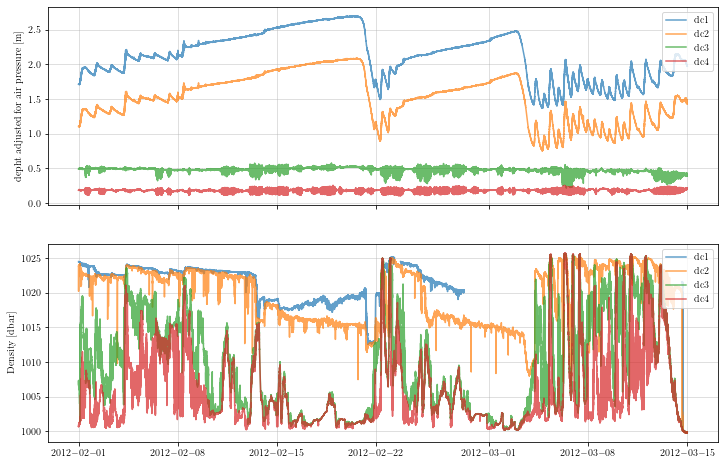

In [15]:
x_dc1 = DC_1.index
y_dc1 = DC_1['Depth'].values
x_dc2 = DC_2.index
y_dc2 = DC_2['Depth'].values
x_dc3 = DC_3.index
y_dc3 = DC_3['Depth'].values
x_dc4 = DC_4.index
y_dc4 = DC_4['Depth'].values

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

ax1.plot(x_dc1,y_dc1, alpha=0.7);
ax1.plot(x_dc2,y_dc2, alpha=0.7);
ax1.plot(x_dc3,y_dc3, alpha=0.7);
ax1.plot(x_dc4,y_dc4, alpha=0.7);
ax1.legend(["dc1","dc2", "dc3", "dc4"], loc='upper right');
ax1.set_ylabel('depht adjusted for air pressure [m]')
ax1.grid(alpha=0.5)

ax2.plot(x_dc1,rho_dc1, alpha=0.7);
ax2.plot(x_dc2,rho_dc2, alpha=0.7);
ax2.plot(x_dc3,rho_dc3, alpha=0.7);
ax2.plot(x_dc4,rho_dc4, alpha=0.7);
ax2.legend(["dc1","dc2", "dc3", "dc4"], loc='upper right');
ax2.set_ylabel('Density [dbar]')
ax2.grid(alpha=0.5)

## Velocidad

In [15]:
def mov_avg(array, time_values, nsmooth):
    df = pd.DataFrame(np.transpose(array), columns = ['bin_1','bin_2','bin_3','bin_4','bin_5','bin_6','bin_7','bin_8','bin_9','bin_10','bin_11','bin_12','bin_13','bin_14','bin_15','bin_16','bin_17','bin_18','bin_19','bin_20','bin_21','bin_22','bin_23','bin_24','bin_25'])
    df.index = time_values
    mask = []
    for i in range(len(time_values)):
        if i%nsmooth == 0:
            mask.append(True)
        else:
            mask.append(False)
    df['blank'] = np.zeros(len(df))
    new_df = df['blank'][mask].to_frame()
    for i in df.columns:
        rolling = df[i].rolling(window=nsmooth, min_periods=1)
        rolling_mean = rolling.mean()
        masked_rolling_mean = rolling_mean[mask]
        new_df[i] = masked_rolling_mean
    new_df.drop('blank', inplace=True, axis=1)
    return new_df

In [16]:
def earth_to_uv(dfe, dfn, a): 
    "This takes 2 dataframes of east and north coordinates respectively and the regresion coeficient and transforms them to the direction of the coeficient"
    alpha = np.arctan(a) #Ángulo
    t, b = dfe.shape 
    M = np.array([[-np.cos(alpha), np.sin(alpha)],
                  [np.sin(alpha), np.cos(alpha)]]) #Matriz de transfomación
    columns = dfe.columns
    u = np.zeros((0,t)) #Inicialización de variables
    v = np.zeros((0,t)) #Inicialización de variables
    for i in columns: #Iteración sobre las columnas de los dataframes
        bin_ = np.array([[dfe[i].values],
                        [dfn[i].values]]) # Matriz de coordenadas east-north
        ui, vi = np.tensordot(M, bin_, 1) #Multiplicación matricial
        u = np.concatenate((u, ui), axis=0) #Unión de los resultados de u
        v = np.concatenate((v, vi), axis=0)#Unión de los resultados de v
    return u, v

In [17]:
#Convertir velocidades a DataFrames
columnas = ['bin_1','bin_2','bin_3','bin_4','bin_5','bin_6','bin_7','bin_8','bin_9','bin_10','bin_11','bin_12','bin_13','bin_14','bin_15','bin_16','bin_17','bin_18','bin_19','bin_20','bin_21','bin_22','bin_23','bin_24','bin_25']

df_east = pd.DataFrame(earth.east.values, columns = columnas)
df_east.index = earth.time.values

df_north = pd.DataFrame(earth.north.values, columns = columnas)
df_north.index = earth.time.values

In [18]:
U, V = earth_to_uv(df_east, df_north, 0.79970532)

In [19]:
#Convertir velocidades u-v a dataframe
dfu = pd.DataFrame(np.transpose(U), columns=columnas)
dfu.index = df_east.index
dfv = pd.DataFrame(np.transpose(V), columns=columnas)
dfv.index = df_east.index

In [20]:
# Haciendo un promedio por cada burst para east-north
indice_dfe = df_east.index

bu_east = pd.DataFrame()
time = []
for i in df_east.columns:
    val = []
    for j in range(0,len(df_east), 600):
        if j != 0:
            val.append(df_east[i].iloc[j-600:j].mean())
            if i == 'bin_1':
                time.append(indice_dfe[j-300])
    bu_east[i] = val
bu_east.index = time

indice_dfn = df_north.index

bu_north = pd.DataFrame()
time = []
for i in df_north.columns:
    val = []
    for j in range(0,len(df_north), 600):
        if j != 0:
            val.append(df_north[i].iloc[j-600:j].mean())
            if i == 'bin_1':
                time.append(indice_dfn[j-300])
    bu_north[i] = val
bu_north.index = time

In [21]:
# bu_east.to_csv('data/bu_east.csv')
# bu_north.to_csv('data/bu_north.csv')

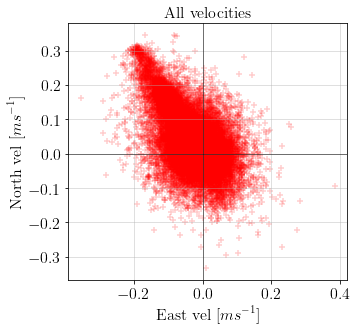

In [22]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(5, 5))

ax1.scatter(bu_east.values, bu_north.values, c='r', marker='+', alpha=0.2);
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"All velocities",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.set_aspect('equal')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

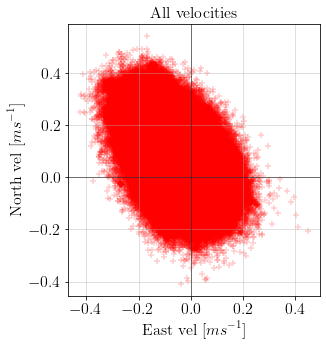

In [33]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(5, 5))

ax1.scatter(df_east.values, df_north.values, c='r', marker='+', alpha=0.2);
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"All velocities",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.set_aspect('equal')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

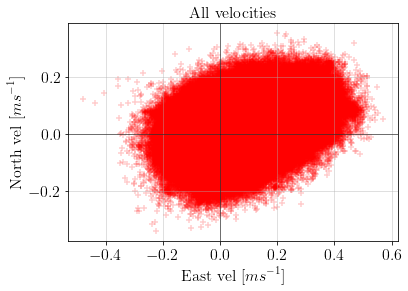

In [36]:
fig, (ax1) = plt.subplots(nrows=1)

ax1.scatter(U, V, c='r', marker='+', alpha=0.2);
ax1.set_ylabel(r"North vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_xlabel(r"East vel "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax1.set_title(r"All velocities",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.set_aspect('equal', 'box')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

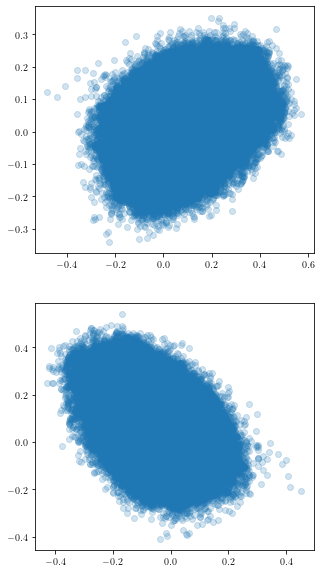

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5,10))
ax1.scatter(U, V, alpha=0.2)
ax2.scatter(df_east.values, df_north.values, alpha=0.2)

In [25]:
# Haciendo un promedio por cada burst
indice_dfu = dfu.index

bu = pd.DataFrame()
time = []
for i in dfu.columns:
    val = []
    for j in range(0,len(dfu), 600):
        if j != 0:
            val.append(dfu[i].iloc[j-600:j].mean())
            if i == 'bin_1':
                time.append(indice_dfu[j-300])
    bu[i] = val
bu.index = time

indice_dfv = dfv.index

bv = pd.DataFrame()
time = []
for i in dfv.columns:
    val = []
    for j in range(0,len(dfv), 600):
        if j != 0:
            val.append(dfv[i].iloc[j-600:j].mean())
            if i == 'bin_1':
                time.append(indice_dfv[j-300])
    bv[i] = val
bv.index = time

In [21]:
# bu.to_csv('data/bu.csv')
# bv.to_csv('data/bv.csv')

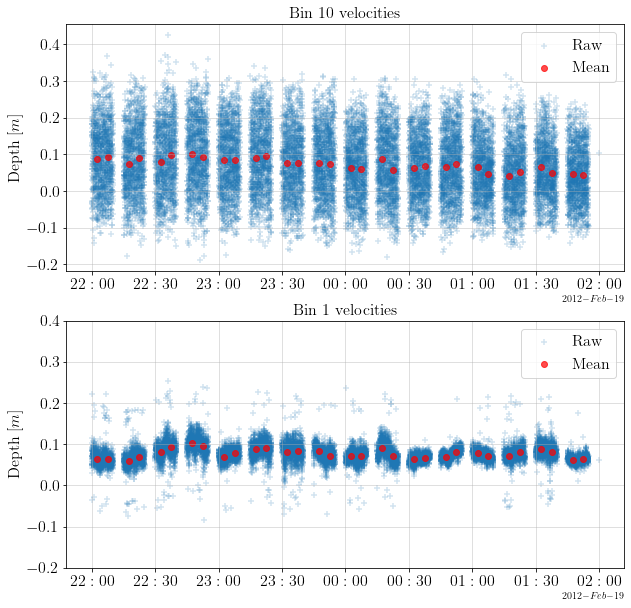

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 10 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_10'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_10'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 1 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_1'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_1'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)

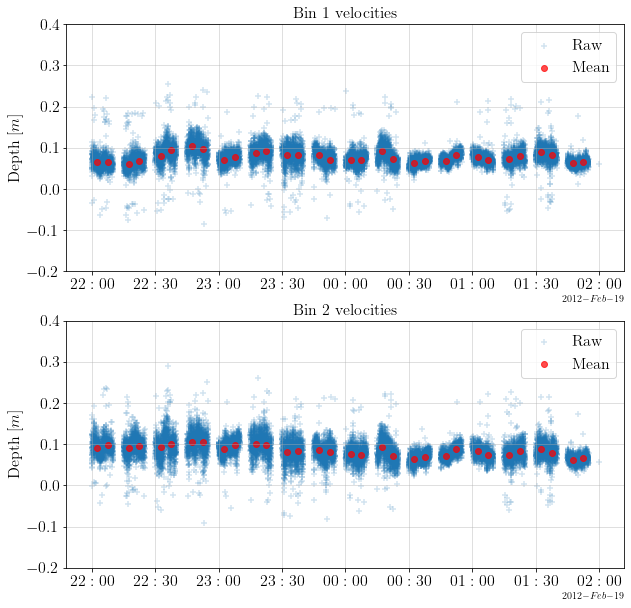

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 1 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_1'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_1'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 2 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_2'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_2'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

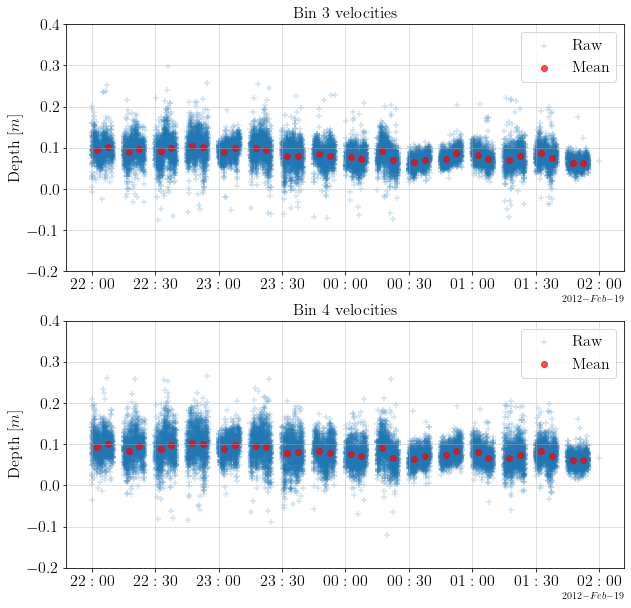

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 3 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_3'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_3'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 4 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_4'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_4'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

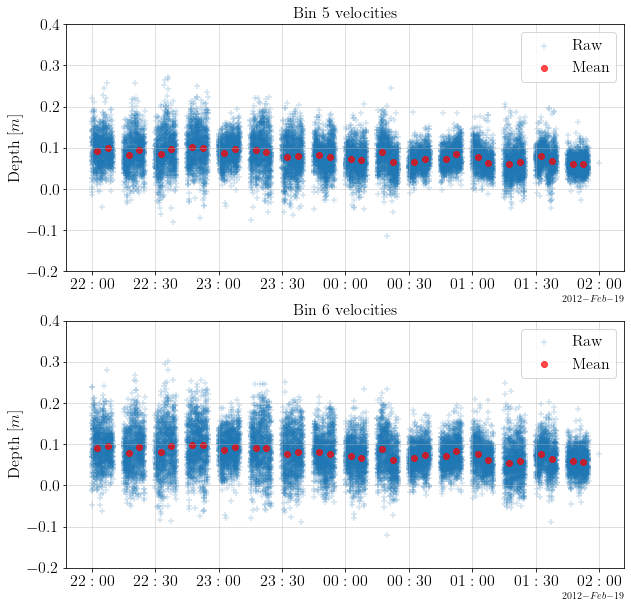

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 5 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_5'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_5'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 6 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_6'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_6'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

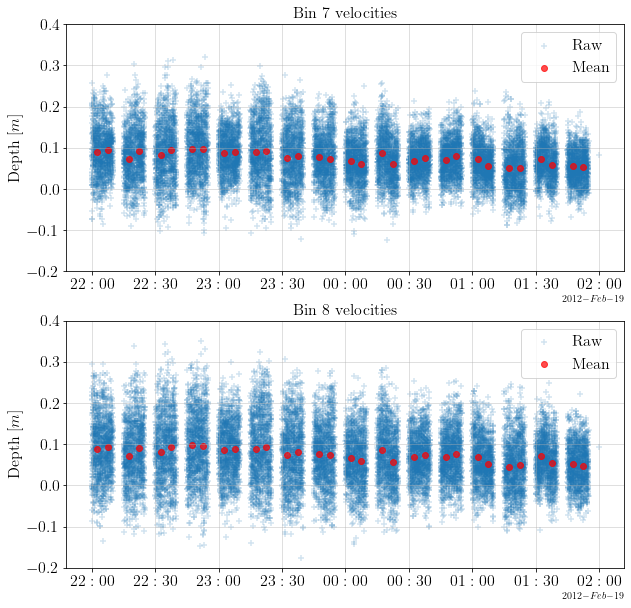

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 7 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_7'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_7'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 8 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_8'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_8'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

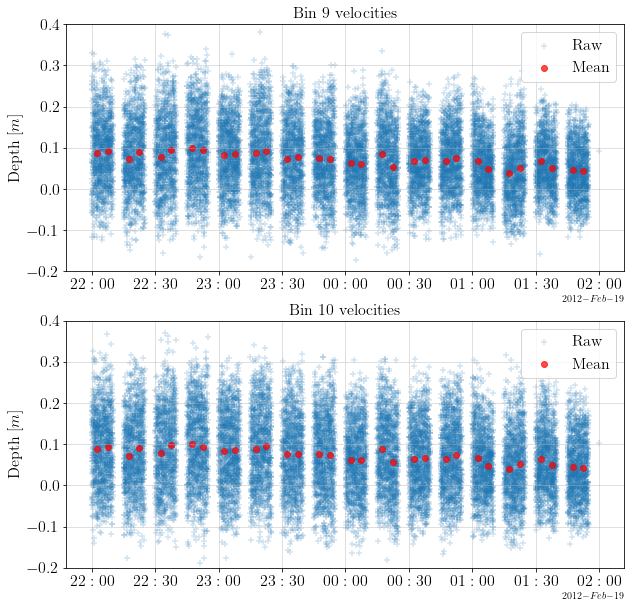

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 9 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_9'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_9'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 10 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_10'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_10'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

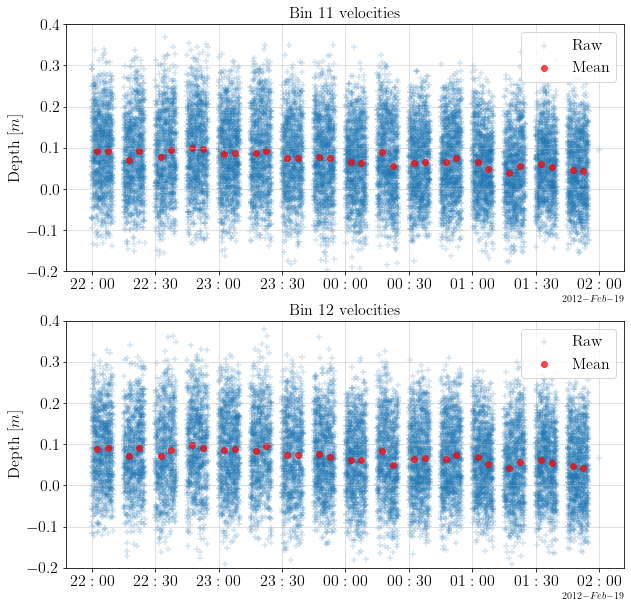

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 11 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_11'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_11'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 12 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_12'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_12'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

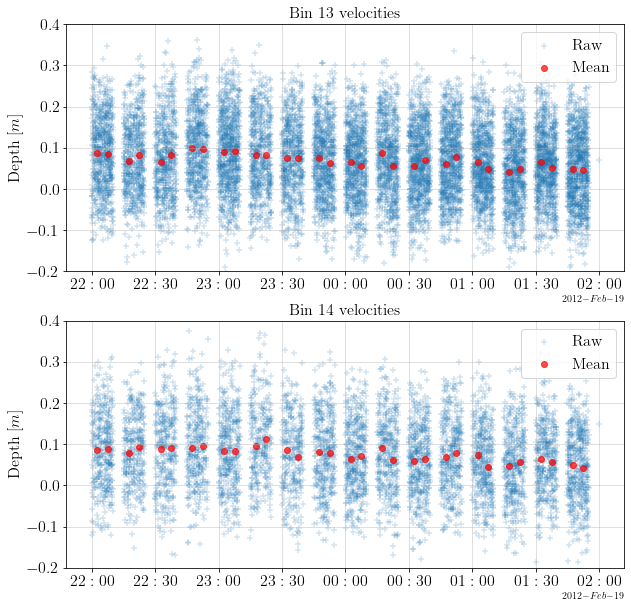

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 13 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_13'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_13'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 14 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_14'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_14'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

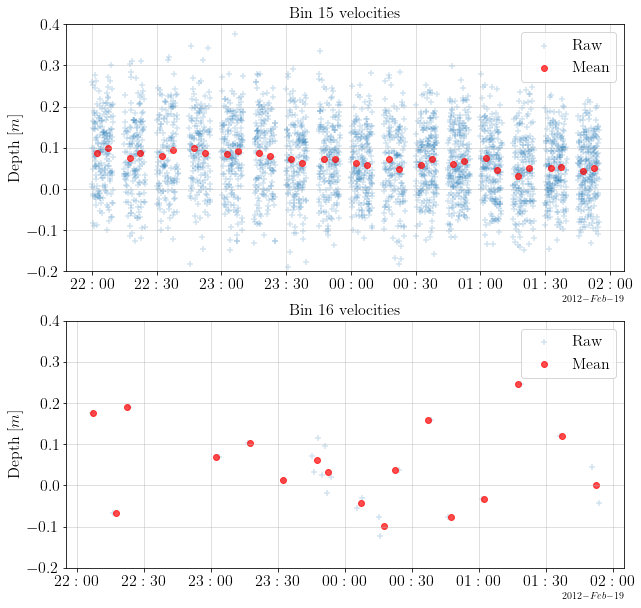

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)

dat1 = dfu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]
dat2 = bu.loc[datetime.datetime(2012,2,18,22,0,0):datetime.datetime(2012,2,19,2,0,0)]

ax1.set_title(r"Bin 15 velocities",
          fontsize=16)
ax1.scatter(dat1.index, dat1['bin_15'], alpha=0.2, marker='+');
ax1.scatter(dat2.index, dat2['bin_15'], alpha=0.7, color='r');
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.set_ylim(-0.2, 0.4)
ax1.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.set_title(r"Bin 16 velocities",
          fontsize=16)
ax2.scatter(dat1.index, dat1['bin_16'], alpha=0.2, marker='+');
ax2.scatter(dat2.index, dat2['bin_16'], alpha=0.7, color='r');
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(['Raw', 'Mean'], loc='upper right', fontsize=16);
ax2.set_ylim(-0.2, 0.4)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator1)
ax2.xaxis.set_major_formatter(formatter1)

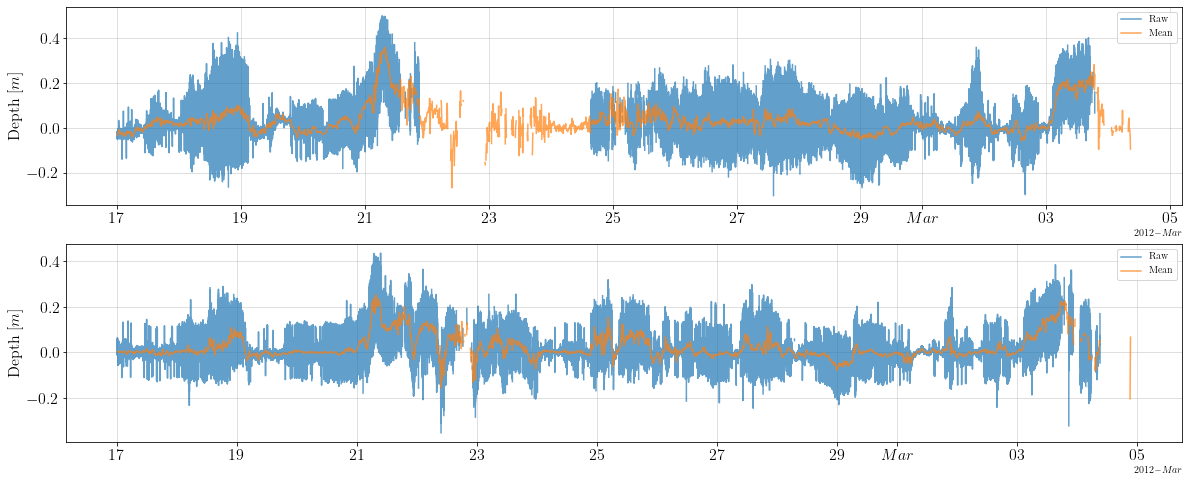

In [50]:
dat1 = dfu.loc[:datetime.datetime(2012,3,5,0,0,0)]
dat2 = bu.loc[:datetime.datetime(2012,3,5,0,0,0)]

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 8))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

ax1.plot(dat1.index, dat1['bin_10'], alpha=0.7);
ax1.plot(dat2.index, dat2['bin_10'], alpha=0.7);
ax1.set_ylabel('Depth $[m]$',
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.legend(["Raw", "Mean"], loc='upper right');
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax2.plot(dat1.index, dat1['bin_1'], alpha=0.7);
ax2.plot(dat2.index, dat2['bin_1'], alpha=0.7);
ax2.set_ylabel('Depth $[m]$',
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.legend(["Raw", "Mean"], loc='upper right');
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)


ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)

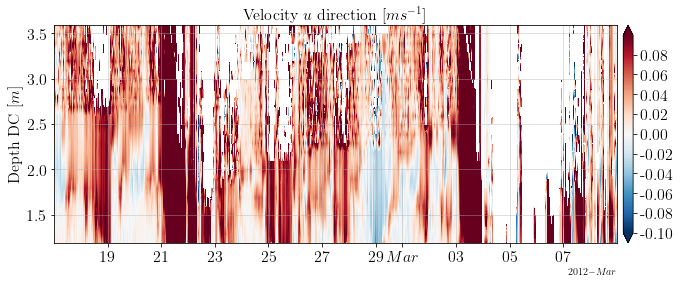

In [23]:
# df = bu1.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
# wdf = dfw1['u'].loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
# dc1 = DC_1.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
# dc2 = DC_2.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
# dc3 = DC_3.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
# dc4 = DC_4.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]

y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.1
umax = 0.1
vmin = -0.1
vmax = 0.1
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, (ax1) = plt.subplots(nrows=1, figsize=(12, 4))

ax1.set_title(r"Velocity $u$ direction "
          r"$[ms^{-1}]$",
          fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)

contourf_ = ax1.contourf(bu.index, y_bin,
                         np.transpose(bu.values),
                         levels=level_boundaries_u,
                         cmap=cm.RdBu_r,
                         vmax=umax, vmin=umin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.01)
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

ax1.set_ylabel(r"Depth DC "
          r"$\displaystyle[m]$",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)

ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

plt.show() 

In [ ]:
fig, ( ax2) = plt.subplots(nrows=1, figsize=(12, 4))

ax2.set_title(r"Velocity $v$ direction "
          r"$[ms^{-1}]$",
          fontsize=16)
contourf_2 = ax2.contourf(dfv.index, y_bin,
                         np.transpose(dfv.values),
                         levels=level_boundaries_v,
                         cmap=cm.RdBu_r,
                         vmax=vmax, vmin=vmin, extend='both')
cbar = fig.colorbar(contourf_2, ax=ax2, pad=0.01)
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

ax2.set_ylabel(r"Depth DC "
          r"$\displaystyle[m]$",
          fontsize=16)
ax2.grid(alpha=0.5)
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)

ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

plt.show() 

In [ ]:
y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.1
umax = 0.1
vmin = -0.1
vmax = 0.1
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

# ax1.xaxis.set_major_locator(locator)
# ax1.xaxis.set_major_formatter(formatter)
# ax2.xaxis.set_major_locator(locator)
# ax2.xaxis.set_major_formatter(formatter)

ax1.set_title(r"Velocity 1st breach "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)
contourf_ = ax1.contourf(bu1.index, y_bin,
                         np.transpose(bu1.values),
                         levels=level_boundaries_u,
                         cmap=cm.RdBu_r,
                         vmax=umax, vmin=umin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.1)
ax1.set_ylabel(r"Depth DC (m)")

ax2.set_title(r"Velocity 2nd breach"
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
# ax2.plot(x, y_d,color='k',alpha=0.5)
contourf_2 = ax2.contourf(bu2.index, y_bin,
                          np.transpose(bu2.values),
                          levels=level_boundaries_u,
                          cmap=cm.RdBu_r,
                          vmax=umax, vmin=umin, extend='both')
cbar = plt.colorbar(contourf_2, ax=ax2, pad=0.1)
ax2.set_ylabel(r"Depth DC (m)")

ax3 = ax1.twinx()
ax3.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax3.plot(dfw1.index, -dfw1['u'],color='c',alpha=0.5)
ax3.axhline(y=0, color='k', linewidth=0.5)

ax4 = ax2.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.plot(dfw2.index, -dfw2['u'], color='c',alpha=0.5)
ax4.axhline(y=0, color='k', linewidth=0.5)

ax3.xaxis.set_major_locator(locator1)
ax3.xaxis.set_major_formatter(formatter1)
ax4.xaxis.set_major_locator(locator2)
ax4.xaxis.set_major_formatter(formatter2)

plt.show() 

In [18]:
dfe1 = df_east.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
dfn1 = df_north.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
dfe2 = df_east.loc[datetime.date(2012,2,26):datetime.date(2012,3,4)]
dfn2 = df_north.loc[datetime.date(2012,2,26):datetime.date(2012,3,4)]

u1, v1 = earth_to_uv(dfe1, dfn1, 0.79742991)
u2, v2 = earth_to_uv(dfe2, dfn2, 0.79742991)

dfu1 = pd.DataFrame(np.transpose(u1), columns=columnas)
dfu1.index = dfe1.index
dfv1 = pd.DataFrame(np.transpose(v1), columns=columnas)
dfv1.index = dfe1.index

dfu2 = pd.DataFrame(np.transpose(u2), columns=columnas)
dfu2.index = dfe2.index
dfv2 = pd.DataFrame(np.transpose(v2), columns=columnas)
dfv2.index = dfe2.index

In [19]:
alpha = np.arctan(1.5)
u = np.zeros((0,576001))
M = np.array([[-np.cos(alpha), np.sin(alpha)],
                  [np.sin(alpha), np.cos(alpha)]])
bin_ = np.array([[dfe1['bin_10'].values],
                 [dfn1['bin_10'].values]])
ui, v = np.tensordot(M, bin_, 1)
u = np.concatenate((u, ui), axis=0)
u

array([[-0.02604905, -0.02290641, -0.02087525, ...,         nan,
                nan,  0.04433205]])

In [20]:
df_east10M = mov_avg(np.transpose(earth.east.values), earth.time.values, nsmooth=600)
df_north10M = mov_avg(np.transpose(earth.north.values), earth.time.values, nsmooth=600)
dfe1_10M = df_east10M.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
dfn1_10M = df_north10M.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
dfe2_10M = df_east10M.loc[datetime.date(2012,2,27):datetime.date(2012,3,4)]
dfn2_10M = df_north10M.loc[datetime.date(2012,2,27):datetime.date(2012,3,4)]
u1_10M, v1_10M = earth_to_uv(dfe1_10M, dfn1_10M, 0.79742991)
u2_10M, v2_10M = earth_to_uv(dfe2_10M, dfn2_10M, 0.79742991)

In [21]:
columnas = ['bin_1','bin_2','bin_3','bin_4','bin_5','bin_6','bin_7','bin_8','bin_9','bin_10','bin_11','bin_12','bin_13','bin_14','bin_15','bin_16','bin_17','bin_18','bin_19','bin_20','bin_21','bin_22','bin_23','bin_24','bin_25']
dfu1_10M = pd.DataFrame(np.transpose(u1_10M), columns=columnas)
dfu1_10M.index = dfe1_10M.index
dfv1_10M = pd.DataFrame(np.transpose(v1_10M), columns=columnas)
dfv1_10M.index = dfe1_10M.index

dfu2_10M = pd.DataFrame(np.transpose(u2_10M), columns=columnas)
dfu2_10M.index = dfe2_10M.index
dfv2_10M = pd.DataFrame(np.transpose(v2_10M), columns=columnas)
dfv2_10M.index = dfe2_10M.index

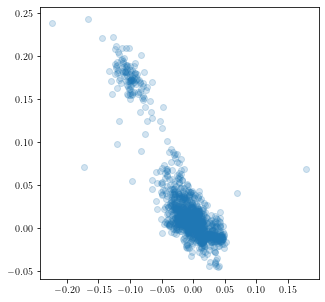

In [22]:
fig, (ax1) = plt.subplots( figsize=(5,5))
ax1.scatter(dfe2_10M['bin_10'], dfn2_10M['bin_10'], alpha=0.2)

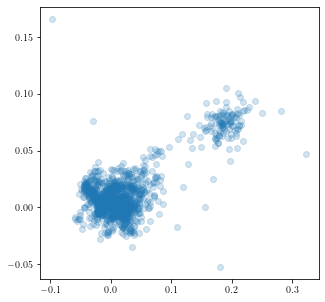

In [23]:
fig, (ax1) = plt.subplots( figsize=(5,5))
ax1.scatter(dfu2_10M['bin_10'], dfv2_10M['bin_10'], alpha=0.2)

In [24]:
# def earth_to_uv_wind(dfe, dfn, a):
#     alpha = np.arctan(a)
#     M = np.array([[-np.cos(alpha), np.sin(alpha)],
#                   [np.sin(alpha), np.cos(alpha)]])
#     bin_ = np.array([[dfe['viento'].values],
#                     [dfn['viento'].values]])
#     ui, vi = np.tensordot(M, bin_, 1)
#     return ui, vi

In [25]:
def earth_to_uv_wind(dfe, dfn, a):
    alpha = np.arctan(a)
    l = len(dfe)
    M = np.array([[-np.cos(alpha), np.sin(alpha)],
                  [np.sin(alpha), np.cos(alpha)]])
    u = []
    v = []
    for i in range(l):
        b = np.array([[dfe['viento'][i]],
                    [dfn['viento'][i]]])
        ui, vi = np.matmul(M, b)
        u.append(ui)
        v.append(vi)
    return u, v

In [26]:
wind_data1 = w.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
wind_data2 = w.loc[datetime.date(2012,2,26):datetime.date(2012,3,4)]

north_w1 = np.float64(wind_data1['Speed'])*np.sin(np.pi*np.float64(wind_data1['Direction'])/180)
east_w1 = np.float64(wind_data1['Speed'])*np.cos(np.pi*np.float64(wind_data1['Direction'])/180)
north_w1 = pd.DataFrame(data=north_w1, columns=['viento'])
east_w1 = pd.DataFrame(data=east_w1, columns=['viento'])

north_w2 = np.float64(wind_data2['Speed'])*np.sin(np.pi*np.float64(wind_data2['Direction'])/180)
east_w2 = np.float64(wind_data2['Speed'])*np.cos(np.pi*np.float64(wind_data2['Direction'])/180)
east_w2 = pd.DataFrame(data=east_w2, columns=['viento'])
north_w2 = pd.DataFrame(data=north_w2, columns=['viento'])
# east_w2['bait'] = east_w2['viento']
# north_w2['bait'] = north_w2['viento']

uw1, vw1 = earth_to_uv(east_w1, north_w1, 0.79742991)
uw2, vw2 = earth_to_uv(east_w2, north_w2, 0.79742991)



In [27]:
dfw1 = pd.DataFrame(np.transpose(np.array([uw1[0,:], vw1[0,:]])), columns=['u', 'v'])
dfw1.index = wind_data1.index
dfw2 = pd.DataFrame(np.transpose(np.array([uw2[0,:], vw2[0,:]])), columns=['u', 'v'])
dfw2.index = wind_data2.index

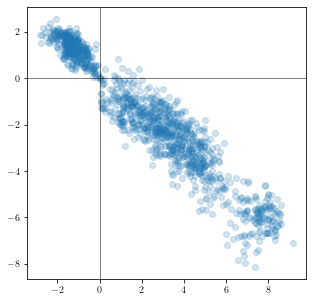

In [28]:
fig, (ax1) = plt.subplots( figsize=(5,5))
ax1.scatter(east_w1['viento'], north_w1['viento'], alpha=0.2)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

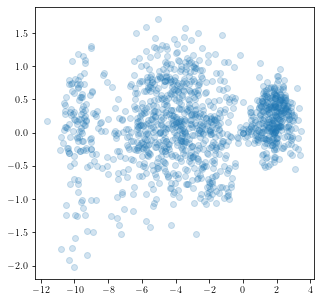

In [29]:
fig, (ax1) = plt.subplots( figsize=(5,5))
ax1.scatter(uw1[0], vw1[0], alpha=0.2)

In [30]:
# Haciendo un promedio por cada burst
indice_dfu1 = dfu1.index

bu1 = pd.DataFrame()
time = []
for i in dfu1.columns:
    val = []
    for j in range(0,len(dfu1), 600):
        if j != 0:
            val.append(dfu1[i].iloc[j-1:j].mean())
            if i == 'bin_1':
                time.append(indice_dfu1[j-1])
    bu1[i] = val
bu1.index = time

indice_dfu2 = dfu2.index

bu2 = pd.DataFrame()
time2 = []
for i in dfu2.columns:
    val2 = []
    for j in range(0,len(dfu2), 600):
        if j != 0:
            val2.append(dfu2[i].iloc[j-1:j].mean())
            if i == 'bin_1':
                time2.append(indice_dfu2[j-1])
    bu2[i] = val2
bu2.index = time2

In [31]:
# Haciendo un promedio por cada burst
indice_dfv1 = dfv1.index

bv1 = pd.DataFrame()
time3 = []
for i in dfv1.columns:
    val3 = []
    for j in range(0,len(dfv1), 600):
        if j != 0:
            val3.append(dfv1[i].iloc[j-1:j].mean())
            if i == 'bin_1':
                time3.append(indice_dfv1[j-1])
    bv1[i] = val3
bv1.index = time3

indice_dfv2 = dfv2.index

bv2 = pd.DataFrame()
time4 = []
for i in dfv2.columns:
    val4 = []
    for j in range(0,len(dfv2), 600):
        if j != 0:
            val4.append(dfv2[i].iloc[j-1:j].mean())
            if i == 'bin_1':
                time4.append(indice_dfv2[j-1])
    bv2[i] = val4
bv2.index = time4

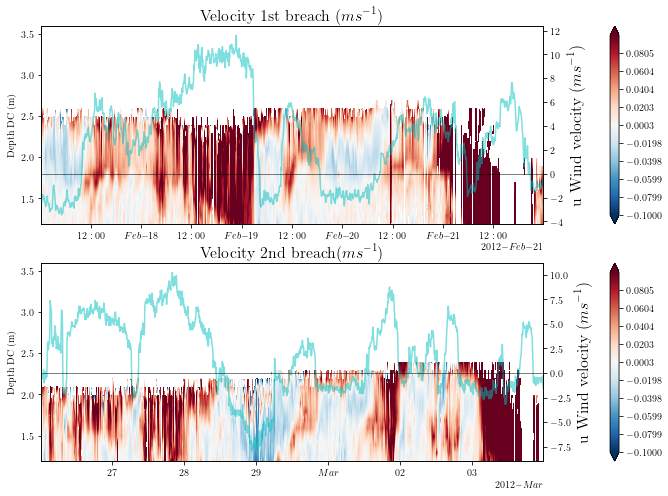

In [32]:
y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.1
umax = 0.1
vmin = -0.1
vmax = 0.1
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

# ax1.xaxis.set_major_locator(locator)
# ax1.xaxis.set_major_formatter(formatter)
# ax2.xaxis.set_major_locator(locator)
# ax2.xaxis.set_major_formatter(formatter)

ax1.set_title(r"Velocity 1st breach "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)
contourf_ = ax1.contourf(bu1.index, y_bin,
                         np.transpose(bu1.values),
                         levels=level_boundaries_u,
                         cmap=cm.RdBu_r,
                         vmax=umax, vmin=umin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.1)
ax1.set_ylabel(r"Depth DC (m)")

ax2.set_title(r"Velocity 2nd breach"
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
# ax2.plot(x, y_d,color='k',alpha=0.5)
contourf_2 = ax2.contourf(bu2.index, y_bin,
                          np.transpose(bu2.values),
                          levels=level_boundaries_u,
                          cmap=cm.RdBu_r,
                          vmax=umax, vmin=umin, extend='both')
cbar = plt.colorbar(contourf_2, ax=ax2, pad=0.1)
ax2.set_ylabel(r"Depth DC (m)")

ax3 = ax1.twinx()
ax3.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax3.plot(dfw1.index, -dfw1['u'],color='c',alpha=0.5)
ax3.axhline(y=0, color='k', linewidth=0.5)

ax4 = ax2.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.plot(dfw2.index, -dfw2['u'], color='c',alpha=0.5)
ax4.axhline(y=0, color='k', linewidth=0.5)

ax3.xaxis.set_major_locator(locator1)
ax3.xaxis.set_major_formatter(formatter1)
ax4.xaxis.set_major_locator(locator2)
ax4.xaxis.set_major_formatter(formatter2)

plt.show() 

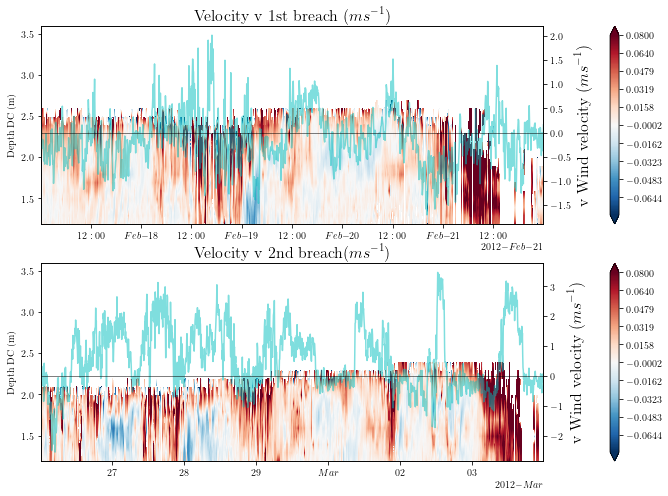

In [33]:
y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.1
umax = 0.1
vmin = -0.08
vmax = 0.08
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

# ax1.xaxis.set_major_locator(locator)
# ax1.xaxis.set_major_formatter(formatter)
# ax2.xaxis.set_major_locator(locator)
# ax2.xaxis.set_major_formatter(formatter)

ax1.set_title(r"Velocity v 1st breach "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)
contourf_ = ax1.contourf(bv1.index, y_bin,
                         np.transpose(bv1.values),
                         levels=level_boundaries_v,
                         cmap=cm.RdBu_r,
                         vmax=vmax, vmin=vmin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.1)
ax1.set_ylabel(r"Depth DC (m)")

ax2.set_title(r"Velocity v 2nd breach"
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
# ax2.plot(x, y_d,color='k',alpha=0.5)
contourf_2 = ax2.contourf(bv2.index, y_bin,
                          np.transpose(bv2.values),
                          levels=level_boundaries_v,
                          cmap=cm.RdBu_r,
                          vmax=vmax, vmin=vmin, extend='both')
cbar = plt.colorbar(contourf_2, ax=ax2, pad=0.1)
ax2.set_ylabel(r"Depth DC (m)")

ax3 = ax1.twinx()
ax3.set_ylabel(r"v Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax3.plot(dfw1.index, -dfw1['v'],color='c',alpha=0.5)
ax3.axhline(y=0, color='k', linewidth=0.5)

ax4 = ax2.twinx()
ax4.set_ylabel(r"v Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.plot(dfw2.index, -dfw2['v'], color='c',alpha=0.5)
ax4.axhline(y=0, color='k', linewidth=0.5)

ax3.xaxis.set_major_locator(locator1)
ax3.xaxis.set_major_formatter(formatter1)
ax4.xaxis.set_major_locator(locator2)
ax4.xaxis.set_major_formatter(formatter2)

plt.show() 

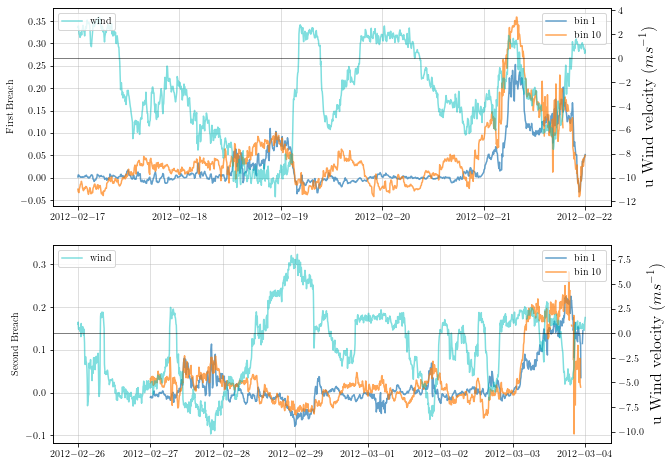

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8), sharex=False)
# x1 = pd.DatetimeIndex(dfe1_10M.index).tz_localize('UTC').tz_convert('America/Los_Angeles')
# x2 = pd.DatetimeIndex(dfe2_10M.index).tz_localize('UTC').tz_convert('America/Los_Angeles')
# xw1 = pd.DatetimeIndex(wind_data1.index).tz_localize('UTC').tz_convert('America/Los_Angeles')
# xw2 = pd.DatetimeIndex(wind_data2.index).tz_localize('UTC').tz_convert('America/Los_Angeles')
x1 = dfe1_10M.index
x2 = dfe2_10M.index
xw1 = wind_data1.index
xw2 = wind_data2.index

ax1.plot(x1, u1_10M[0,:], alpha=0.7);
ax1.plot(x1, u1_10M[9,:], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax1.legend(["bin 1", "bin 10"], loc='upper right');
ax1.set_ylabel('First Breach')
ax1.grid(alpha=0.5)
# ax1.axvline(x=datetime.datetime(2012,2,21,7,0,0), color='r', linewidth=0.6)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

ax2.plot(x2, u2_10M[0,:], alpha=0.7);
ax2.plot(x2, u2_10M[9,:], alpha=0.7);
# ax2.plot(x,e[9,:], alpha=0.7);
# ax2.plot(x,n[9,:], alpha=0.7);
# ax2.plot(x,v[9,:], alpha=0.7);
ax2.legend(["bin 1", "bin 10"], loc='upper right');
ax2.set_ylabel('Second Breach')
ax2.grid(alpha=0.5)
# ax2.axvline(x=datetime.datetime(2012,3,3,8,0,0), color='r', linewidth=0.6)
# ax2.text(pd.to_datetime('2012-3-16'),18.5, '(B)')

ax3 = ax2.twinx()
ax3.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax3.plot(dfw2.index, dfw2['u'],color='c',alpha=0.5)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.legend(["wind"], loc='upper left');

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.plot(dfw1.index, dfw1['u'], color='c',alpha=0.5)
ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.legend(["wind"], loc='upper left');

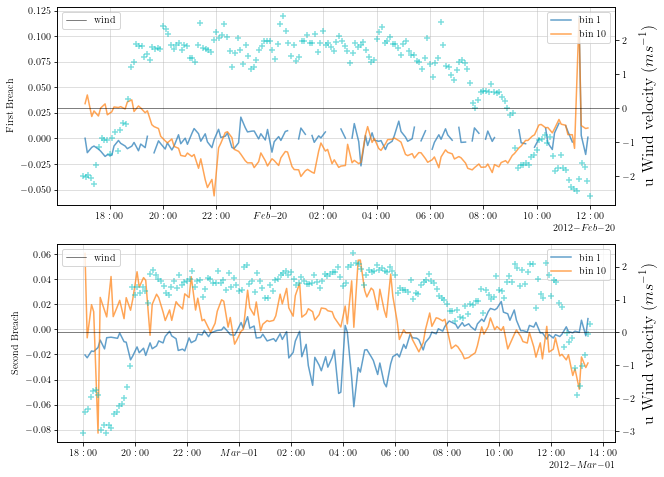

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = bu1.loc[datetime.datetime(2012,2,19,17,0,0):datetime.datetime(2012,2,20,12,0,0)]
datw1 = dfw1.loc[datetime.datetime(2012,2,19,17,0,0):datetime.datetime(2012,2,20,12,0,0)]
dat2 = bu2.loc[datetime.datetime(2012,2,29,18,0,0):datetime.datetime(2012,3,1,13,30,0)]
datw2 = dfw2.loc[datetime.datetime(2012,2,29,18,0,0):datetime.datetime(2012,3,1,13,30,0)]

ax1.plot(dat1.index, dat1['bin_1'], alpha=0.7);
ax1.plot(dat1.index, dat1['bin_10'], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax1.legend(["bin 1", "bin 10"], loc='upper right');
ax1.set_ylabel('First Breach')
ax1.grid(alpha=0.5)
# ax1.axvline(x=datetime.datetime(2012,2,21,7,0,0), color='r', linewidth=0.6)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

ax2.plot(dat2.index, dat2['bin_1'], alpha=0.7);
ax2.plot(dat2.index, dat2['bin_10'], alpha=0.7);
# ax2.plot(x,e[9,:], alpha=0.7);
# ax2.plot(x,n[9,:], alpha=0.7);
# ax2.plot(x,v[9,:], alpha=0.7);
ax2.legend(["bin 1", "bin 10"], loc='upper right');
ax2.set_ylabel('Second Breach')
ax2.grid(alpha=0.5)
# ax2.axvline(x=datetime.datetime(2012,3,3,8,0,0), color='r', linewidth=0.6)
# ax2.text(pd.to_datetime('2012-3-16'),18.5, '(B)')

ax3 = ax2.twinx()
ax3.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax3.scatter(datw2.index, datw2['u'],color='c',alpha=0.5, marker="+")
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.legend(["wind"], loc='upper left');

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.scatter(datw1.index, datw1['u'], color='c',alpha=0.5, marker="+")
ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.legend(["wind"], loc='upper left');

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)
ax3.xaxis.set_major_locator(locator2)
ax3.xaxis.set_major_formatter(formatter2)
ax4.xaxis.set_major_locator(locator1)
ax4.xaxis.set_major_formatter(formatter1)

In [36]:
bu1

bin_1     bin_2     bin_3     bin_4     bin_5  \
2012-02-17 00:04:59.500  7.733486e-03  0.007904  0.004100 -0.001029 -0.009809   
2012-02-17 00:09:59.500  6.048529e-03 -0.000423  0.001886 -0.002775 -0.014133   
2012-02-17 00:19:59.500  1.124895e-19  0.002352  0.005593  0.009344 -0.000857   
2012-02-17 00:24:59.500 -1.504434e-03 -0.005064 -0.004873  0.005899 -0.000043   
2012-02-17 00:34:59.500  1.212938e-03 -0.001789 -0.002678  0.007016  0.006072   
...                               ...       ...       ...       ...       ...   
2012-02-21 23:24:59.500  3.920587e-02  0.034546  0.013658  0.017295  0.090205   
2012-02-21 23:34:59.500  4.299088e-02  0.038748  0.024429  0.035653  0.051765   
2012-02-21 23:39:59.460  6.159996e-02  0.047285  0.028093  0.026510  0.014587   
2012-02-21 23:49:59.500  4.619981e-02  0.035668  0.024757  0.035646  0.053845   
2012-02-21 23:54:59.500  5.841492e-02  0.052548  0.041279  0.054341  0.017554   

                            bin_6     bin_7     bin_8     bin_9    bin_10  \
2012-02-17 00:04:59.500 -0.024648 -0.031511 -0.031088 -0.038894 -0.043447   
2012-02-17 00:09:59.500 -0.024789 -0.018730 -0.020573 -0.021516 -0.019651   
2012-02-17 00:19:59.500 -0.007468 -0.009344 -0.009430 -0.017883 -0.025057   
2012-02-17 00:24:59.500 -0.007935 -0.017150 -0.016726 -0.031101 -0.026070   
2012-02-17 00:34:59.500 -0.000986 -0.003339 -0.002904 -0.010036 -0.005294   
...                           ...       ...       ...       ...       ...   
2012-02-21 23:24:59.500  0.025606  0.017354       NaN       NaN       NaN   
2012-02-21 23:34:59.500  0.091769  0.041322  0.019234       NaN       NaN   
2012-02-21 23:39:59.460  0.103407  0.037024  0.026669       NaN       NaN   
2012-02-21 23:49:59.500  0.076712  0.034669  0.027012       NaN       NaN   
2012-02-21 23:54:59.500  0.125988  0.068221  0.038385       NaN       NaN   

                           bin_11    bin_12    bin_13    bin_14    bin_15  \
2012-02-17 00:04:59.500 -0.027074  0.017023  0.052130       NaN       NaN   
2012-02-17 00:09:59.500 -0.002302  0.032933  0.075109  0.107829       NaN   
2012-02-17 00:19:59.500  0.007804  0.032055  0.048637  0.019739       NaN   
2012-02-17 00:24:59.500  0.004354  0.019631  0.040436  0.082828  0.024299   
2012-02-17 00:34:59.500  0.009772  0.023381  0.043539  0.068551  0.022689   
...                           ...       ...       ...       ...       ...   
2012-02-21 23:24:59.500       NaN       NaN       NaN       NaN       NaN   
2012-02-21 23:34:59.500       NaN       NaN       NaN       NaN       NaN   
2012-02-21 23:39:59.460       NaN       NaN       NaN       NaN       NaN   
2012-02-21 23:49:59.500       NaN       NaN       NaN       NaN       NaN   
2012-02-21 23:54:59.500       NaN       NaN       NaN       NaN       NaN   

                         bin_16  bin_17  bin_18  bin_19  bin_20  bin_21  \
2012-02-17 00:04:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-17 00:09:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-17 00:19:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-17 00:24:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-17 00:34:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2012-02-21 23:24:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-21 23:34:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-21 23:39:59.460     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-21 23:49:59.500     NaN     NaN     NaN     NaN     NaN     NaN   
2012-02-21 23:54:59.500     NaN     NaN     NaN     NaN     NaN     NaN   

                         bin_22  bin_23  bin_24  bin_25  
2012-02-17 00:04:59.500     NaN     NaN     NaN     NaN  
2012-02-17 00:09:59.500     NaN     NaN     NaN     NaN  
2012-02-17 00:19:59.500     NaN     NaN     NaN     NaN  
2012-02-17 00:24:59.500     NaN     NaN     NaN     NaN  
2012-02-17 00:34:5

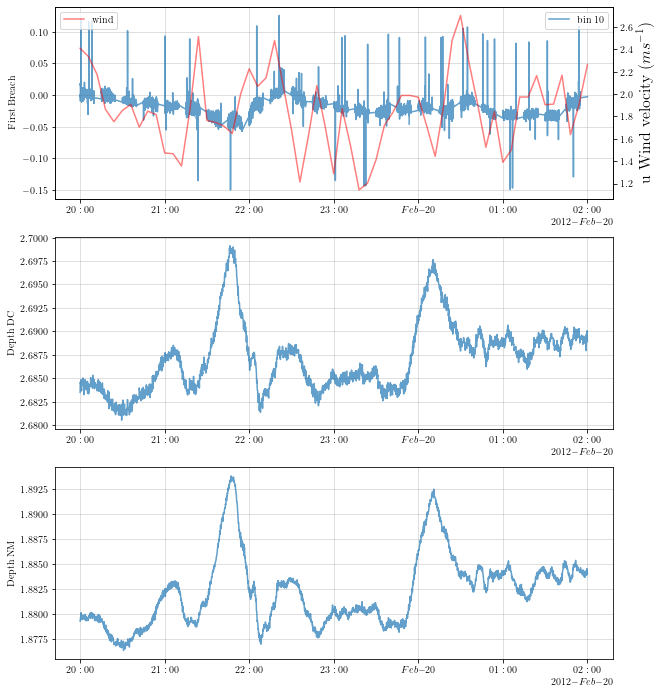

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 12))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = dfu1.loc[datetime.datetime(2012,2,19,20,0,0):datetime.datetime(2012,2,20,2,0,0)]
datw1 = dfw1.loc[datetime.datetime(2012,2,19,20,0,0):datetime.datetime(2012,2,20,2,0,0)]
dat2 = dfu2.loc[datetime.datetime(2012,2,29,18,0,0):datetime.datetime(2012,3,1,13,30,0)]
datw2 = dfw2.loc[datetime.datetime(2012,2,29,18,0,0):datetime.datetime(2012,3,1,13,30,0)]

prof_DC = DC_1.loc[datetime.datetime(2012,2,19,20,0,0):datetime.datetime(2012,2,20,2,0,0)]
prof_NM = NM_1.loc[datetime.datetime(2012,2,19,20,0,0):datetime.datetime(2012,2,20,2,0,0)]

# ax1.plot(dat1.index, dat1['bin_1'], alpha=0.7);
ax1.plot(dat1.index, dat1['bin_10'], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax1.legend(["bin 10"], loc='upper right');
ax1.set_ylabel('First Breach')
ax1.grid(alpha=0.5)
# ax1.axvline(x=datetime.datetime(2012,2,21,7,0,0), color='r', linewidth=0.6)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

ax2.plot(prof_DC.index, prof_DC['Depth'], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax2.set_ylabel('Depth DC')
ax2.grid(alpha=0.5)

ax3.plot(prof_NM.index, prof_NM['Depth'], alpha=0.7);
ax3.set_ylabel('Depth NM')
ax3.grid(alpha=0.5)

# ax2.plot(dat2.index, dat2['bin_1'], alpha=0.7);
# ax2.plot(dat2.index, dat2['bin_10'], alpha=0.7);
# # ax2.plot(x,e[9,:], alpha=0.7);
# # ax2.plot(x,n[9,:], alpha=0.7);
# # ax2.plot(x,v[9,:], alpha=0.7);
# ax2.legend(["bin 1", "bin 10"], loc='upper right');
# ax2.set_ylabel('Second Breach')
# ax2.grid(alpha=0.5)
# # ax2.axvline(x=datetime.datetime(2012,3,3,8,0,0), color='r', linewidth=0.6)
# # ax2.text(pd.to_datetime('2012-3-16'),18.5, '(B)')

# ax3 = ax2.twinx()
# ax3.set_ylabel(r"u Wind velocity "
#           r"$\displaystyle(ms^{-1})$",
#           fontsize=16)
# ax3.plot(datw2.index, datw2['u'],color='c',alpha=0.5)
# ax3.axhline(y=0, color='k', linewidth=0.5)
# ax3.legend(["wind"], loc='upper left');

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.plot(datw1.index, datw1['u'], color='r',alpha=0.5)
# ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.legend(["wind"], loc='upper left');

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)
ax3.xaxis.set_major_locator(locator2)
ax3.xaxis.set_major_formatter(formatter2)
# ax2.xaxis.set_major_locator(locator2)
# ax2.xaxis.set_major_formatter(formatter2)
# ax3.xaxis.set_major_locator(locator2)
# ax3.xaxis.set_major_formatter(formatter2)
ax4.xaxis.set_major_locator(locator1)
ax4.xaxis.set_major_formatter(formatter1)

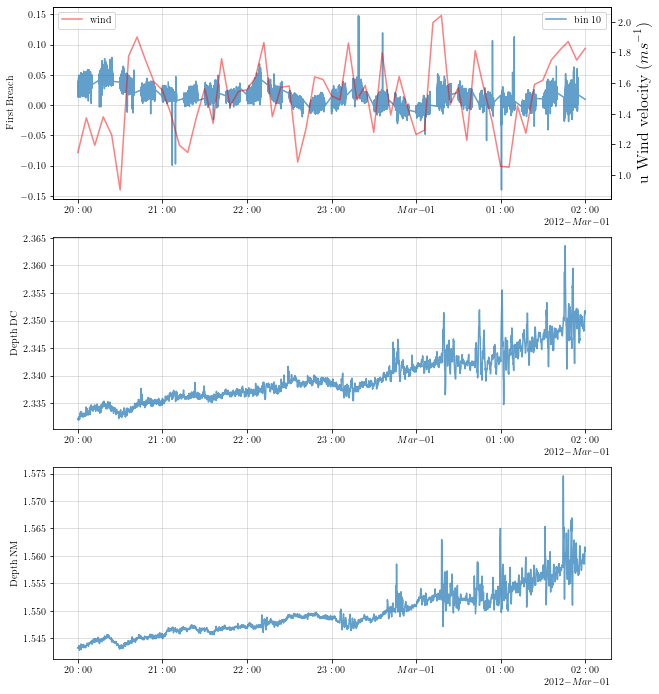

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 12))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = dfu1.loc[datetime.datetime(2012,2,19,20,0,0):datetime.datetime(2012,2,20,2,0,0)]
datw1 = dfw1.loc[datetime.datetime(2012,2,19,20,0,0):datetime.datetime(2012,2,20,2,0,0)]
dat2 = dfu2.loc[datetime.datetime(2012,2,29,20,0,0):datetime.datetime(2012,3,1,2,0,0)]
datw2 = dfw2.loc[datetime.datetime(2012,2,29,20,0,0):datetime.datetime(2012,3,1,2,0,0)]

prof_DC = DC_1.loc[datetime.datetime(2012,2,29,20,0,0):datetime.datetime(2012,3,1,2,0,0)]
prof_NM = NM_1.loc[datetime.datetime(2012,2,29,20,0,0):datetime.datetime(2012,3,1,2,0,0)]

# ax1.plot(dat1.index, dat1['bin_1'], alpha=0.7);
ax1.plot(dat2.index, dat2['bin_10'], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax1.legend(["bin 10"], loc='upper right');
ax1.set_ylabel('First Breach')
ax1.grid(alpha=0.5)
# ax1.axvline(x=datetime.datetime(2012,2,21,7,0,0), color='r', linewidth=0.6)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

ax2.plot(prof_DC.index, prof_DC['Depth'], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax2.set_ylabel('Depth DC')
ax2.grid(alpha=0.5)

ax3.plot(prof_NM.index, prof_NM['Depth'], alpha=0.7);
ax3.set_ylabel('Depth NM')
ax3.grid(alpha=0.5)

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.plot(datw2.index, datw2['u'], color='r',alpha=0.5)
# ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.legend(["wind"], loc='upper left');

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)
ax3.xaxis.set_major_locator(locator2)
ax3.xaxis.set_major_formatter(formatter2)
# ax2.xaxis.set_major_locator(locator2)
# ax2.xaxis.set_major_formatter(formatter2)
# ax3.xaxis.set_major_locator(locator2)
# ax3.xaxis.set_major_formatter(formatter2)
ax4.xaxis.set_major_locator(locator1)
ax4.xaxis.set_major_formatter(formatter1)

### Comparacion densidad y velocidad

In [39]:
x1 = dfe1_10M.index
x2 = dfe2_10M.index
xw1 = wind_data1.index
xw2 = wind_data2.index

rho_dc1 = to_density(DC_1['Depth'], DC_1['Salinity'], DC_1['Temperature'], 37.26)
rho_dc2 = to_density(DC_2['Depth'], DC_2['Salinity'], DC_2['Temperature'], 37.26)
rho_dc3 = to_density(DC_3['Depth'], DC_3['Salinity'], DC_3['Temperature'], 37.26)
rho_dc4 = to_density(DC_4['Depth'], DC_4['Salinity'], DC_4['Temperature'], 37.26)

DC_1['densidad'] = rho_dc1
DC_2['densidad'] = rho_dc2
DC_3['densidad'] = rho_dc3
DC_4['densidad'] = rho_dc4

dc1_1 = DC_1.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
dc2_1 = DC_2.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
dc3_1 = DC_3.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]
dc4_1 = DC_4.loc[datetime.date(2012,2,17):datetime.date(2012,2,22)]

dc1_2 = DC_1.loc[datetime.date(2012,2,27):datetime.date(2012,3,4)]
dc2_2 = DC_2.loc[datetime.date(2012,2,27):datetime.date(2012,3,4)]
dc3_2 = DC_3.loc[datetime.date(2012,2,27):datetime.date(2012,3,4)]
dc4_2 = DC_4.loc[datetime.date(2012,2,27):datetime.date(2012,3,4)]

In [40]:
rho_nm1 = to_density(NM_1['Depth'], NM_1['Salinity'], NM_1['Temperature'], 37.26)
rho_nm2 = to_density(NM_2['Depth'], NM_2['Salinity'], NM_2['Temperature'], 37.26)
rho_nm3 = to_density(NM_3['Depth'], NM_3['Salinity'], NM_3['Temperature'], 37.26)

DC_1['densidad'] = rho_dc1
DC_2['densidad'] = rho_dc2
DC_3['densidad'] = rho_dc3

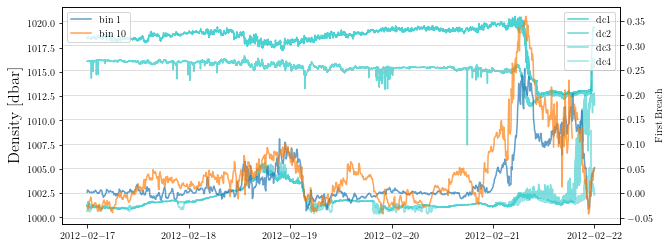

In [41]:
fig, (ax2) = plt.subplots(nrows=1, figsize=(10, 4))

ax2.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax2.plot(dc1_1.index, dc1_1['densidad'], color='c', alpha=0.7);
ax2.plot(dc2_1.index, dc2_1['densidad'], color='c', alpha=0.6);
ax2.plot(dc3_1.index, dc3_1['densidad'], color='c', alpha=0.5);
ax2.plot(dc4_1.index, dc4_1['densidad'], color='c', alpha=0.4);
ax2.legend(["dc1","dc2", "dc3", "dc4"], loc='upper right');
ax2.set_ylabel('Density [dbar]');

ax1 = ax2.twinx()
ax1.plot(x1, u1_10M[0,:], alpha=0.7);
ax1.plot(x1, u1_10M[9,:], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax1.legend(["bin 1", "bin 10"], loc='upper left');
ax1.set_ylabel('First Breach')
ax1.grid(alpha=0.5)
# ax1.axvline(x=datetime.datetime(2012,2,21,7,0,0), color='r', linewidth=0.6)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

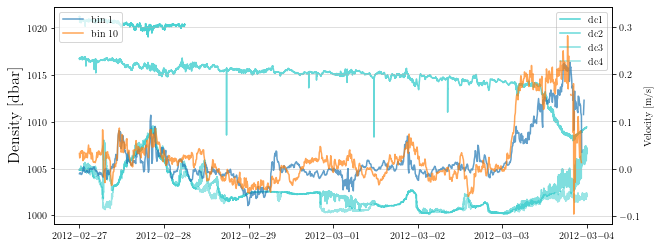

In [42]:
fig, (ax2) = plt.subplots(nrows=1, figsize=(10, 4))

ax2.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax2.plot(dc1_2.index, dc1_2['densidad'], color='c', alpha=0.7);
ax2.plot(dc2_2.index, dc2_2['densidad'], color='c', alpha=0.6);
ax2.plot(dc3_2.index, dc3_2['densidad'], color='c', alpha=0.5);
ax2.plot(dc4_2.index, dc4_2['densidad'], color='c', alpha=0.4);
ax2.legend(["dc1","dc2", "dc3", "dc4"], loc='upper right');
ax2.set_ylabel('Density [dbar]');

ax1 = ax2.twinx()
ax1.plot(x2, u2_10M[0,:], alpha=0.7);
ax1.plot(x2, u2_10M[9,:], alpha=0.7);
# ax1.plot(x,n[0,:], alpha=0.7);
# ax1.plot(x,v[0,:], alpha=0.7);
ax1.legend(["bin 1", "bin 10"], loc='upper left');
ax1.set_ylabel('Velocity [m/s]')
ax1.grid(alpha=0.5)
# ax1.axvline(x=datetime.datetime(2012,2,21,7,0,0), color='r', linewidth=0.6)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

u    2.225777
v    0.960400
Name: 2012-02-19 22:00:00, dtype: float64
u    1.556835
v    0.120183
Name: 2012-02-29 22:00:00, dtype: float64


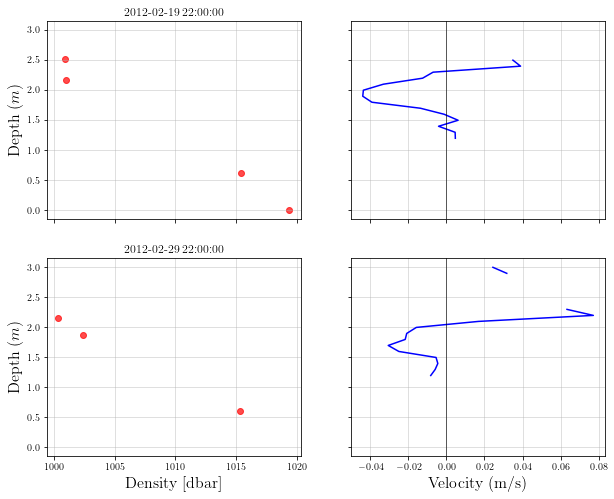

In [43]:
day = datetime.datetime(2012,2,19,22,0,0)

df1 = DC_1.loc[day]
df2 = DC_2.loc[day]
df3 = DC_3.loc[day]
df4 = DC_4.loc[day]

_bin = np.linspace(1.19, 3.59, 25)

DF = dfu1.loc[day]

fig, ([[ax1, ax2],[ax3, ax4]]) = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharey=True, sharex='col')

ax1.set_title(str(day))

ax1.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax1.scatter(df1['densidad'], 0, color='r', alpha=0.7);
ax1.scatter(df2['densidad'], df1['Depth']-df2['Depth'], color='r', alpha=0.7);
ax1.scatter(df3['densidad'], df1['Depth']-df3['Depth'], color='r', alpha=0.7);
ax1.scatter(df4['densidad'], df1['Depth']-df4['Depth'], color='r', alpha=0.7);
ax1.grid(alpha=0.5)

ax2.plot(DF.values, _bin, color='b');
print(dfw1.loc[day])
ax2.grid(alpha=0.5)
ax2.axvline(x=0, color='k', linewidth=0.6)

day2 = datetime.datetime(2012,2,29,22,0,0)

df1 = DC_1.loc[day2]
df2 = DC_2.loc[day2]
df3 = DC_3.loc[day2]
df4 = DC_4.loc[day2]

DF = dfu2.loc[day2]



ax3.set_title(str(day2))

ax3.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax3.scatter(df1['densidad'], df1['Depth']-df1['Depth'], color='r', alpha=0.7);
ax3.scatter(df2['densidad'], df1['Depth']-df2['Depth'], color='r', alpha=0.7);
ax3.scatter(df3['densidad'], df1['Depth']-df3['Depth'], color='r', alpha=0.7);
ax3.scatter(df4['densidad'], df1['Depth']-df4['Depth'], color='r', alpha=0.7);
ax3.set_xlabel('Density [dbar]', fontsize=16);
ax3.grid(alpha=0.5)

ax4.plot(DF.values, _bin, color='b');
ax4.set_xlabel('Velocity (m/s)', fontsize=16);
print(dfw2.loc[day2])
ax4.grid(alpha=0.5)
ax4.axvline(x=0, color='k', linewidth=0.6)

u    1.545938
v    0.291454
Name: 2012-02-21 06:00:00, dtype: float64
u    1.395776
v    0.363107
Name: 2012-03-03 00:00:00, dtype: float64


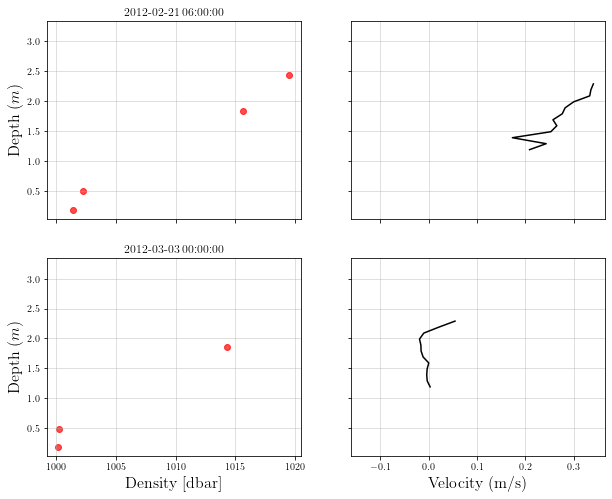

In [44]:
day = datetime.datetime(2012,2,21,6,0,0)

df1 = DC_1.loc[day]
df2 = DC_2.loc[day]
df3 = DC_3.loc[day]
df4 = DC_4.loc[day]

DF = dfu1.loc[day]
_bin = np.linspace(1.19, 3.59, 25)

fig, ([[ax1, ax2],[ax3, ax4]]) = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharey=True, sharex='col')

ax1.set_title('2012-02-21 06:00:00')

ax1.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax1.scatter(df1['densidad'], df1['Depth'], color='r', alpha=0.7);
ax1.scatter(df2['densidad'], df2['Depth'], color='r', alpha=0.7);
ax1.scatter(df3['densidad'], df3['Depth'], color='r', alpha=0.7);
ax1.scatter(df4['densidad'], df4['Depth'], color='r', alpha=0.7);
ax1.grid(alpha=0.5)

ax2.plot(DF.values, _bin, color='k');
print(dfw1.loc[datetime.datetime(2012,2,21,6,0,0)])
ax2.grid(alpha=0.5)

day2 = datetime.datetime(2012,3,3)

df1 = DC_1.loc[day2]
df2 = DC_2.loc[day2]
df3 = DC_3.loc[day2]
df4 = DC_4.loc[day2]

DF = dfu2.loc[day2]
_bin = np.linspace(1.19, 3.59, 25)


ax3.set_title('2012-03-03 00:00:00')

ax3.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax3.scatter(df1['densidad'], df1['Depth'], color='r', alpha=0.7);
ax3.scatter(df2['densidad'], df2['Depth'], color='r', alpha=0.7);
ax3.scatter(df3['densidad'], df3['Depth'], color='r', alpha=0.7);
ax3.scatter(df4['densidad'], df4['Depth'], color='r', alpha=0.7);
ax3.set_xlabel('Density [dbar]', fontsize=16);
ax3.grid(alpha=0.5)

ax4.plot(DF.values, _bin, color='k');
ax4.set_xlabel('Velocity (m/s)', fontsize=16);
print(dfw2.loc[datetime.datetime(2012,3,3)])
ax4.grid(alpha=0.5)

u   -9.048167
v   -0.095134
Name: 2012-02-18 18:00:00, dtype: float64
u   -10.240711
v    -1.443812
Name: 2012-02-27 20:00:00, dtype: float64


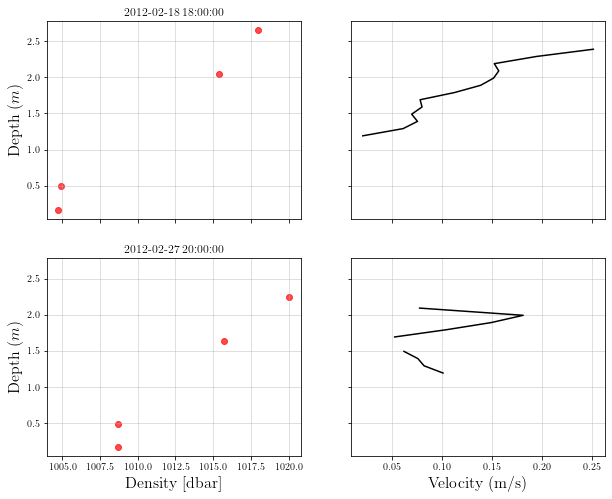

In [45]:
day = datetime.datetime(2012,2,18,18,0,0)

df1 = DC_1.loc[day]
df2 = DC_2.loc[day]
df3 = DC_3.loc[day]
df4 = DC_4.loc[day]

DF = dfu1.loc[day]
_bin = np.linspace(1.19, 3.59, 25)

fig, ([[ax1, ax2],[ax3, ax4]]) = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharey=True, sharex='col')

ax1.set_title('2012-02-18 18:00:00')

ax1.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax1.scatter(df1['densidad'], df1['Depth'], color='r', alpha=0.7);
ax1.scatter(df2['densidad'], df2['Depth'], color='r', alpha=0.7);
ax1.scatter(df3['densidad'], df3['Depth'], color='r', alpha=0.7);
ax1.scatter(df4['densidad'], df4['Depth'], color='r', alpha=0.7);
ax1.grid(alpha=0.5)

ax2.plot(DF.values, _bin, color='k');
print(dfw1.loc[datetime.datetime(2012,2,18,18,0,0)])
ax2.grid(alpha=0.5)

day2 = datetime.datetime(2012,2,27,20,0,0)

df1 = DC_1.loc[day2]
df2 = DC_2.loc[day2]
df3 = DC_3.loc[day2]
df4 = DC_4.loc[day2]

DF = dfu2.loc[day2]
_bin = np.linspace(1.19, 3.59, 25)


ax3.set_title('2012-02-27 20:00:00')

ax3.set_ylabel(r"Depth "
          r"$\displaystyle(m)$",
          fontsize=16)
ax3.scatter(df1['densidad'], df1['Depth'], color='r', alpha=0.7);
ax3.scatter(df2['densidad'], df2['Depth'], color='r', alpha=0.7);
ax3.scatter(df3['densidad'], df3['Depth'], color='r', alpha=0.7);
ax3.scatter(df4['densidad'], df4['Depth'], color='r', alpha=0.7);
ax3.set_xlabel('Density [dbar]', fontsize=16);
ax3.grid(alpha=0.5)

ax4.plot(DF.values, _bin, color='k');
ax4.set_xlabel('Velocity (m/s)', fontsize=16);
print(dfw2.loc[datetime.datetime(2012,2,27,20,0,0)])
ax4.grid(alpha=0.5)

## Richardson number

\begin{equation}
    Ri = \frac{g}{\rho} \frac{\partial \rho / \partial z}{(\partial u / \partial z)^2}
\end{equation}

\begin{equation}
    N^2 = \frac{g}{\rho} \frac{\partial \rho }{\partial z} =  \frac{g}{\rho_1} \frac{\rho_2-\rho_1 }{z_2-z_1}
\end{equation}

<img src="estratos.png" width="500px">

_Usar gravedad reducida?_

In [46]:
g = 9.8
rho1 = DC_1['densidad']
rho2 = DC_2['densidad']
rho3 = DC_3['densidad']
rho4 = DC_4['densidad']
z1 = DC_1['Depth']
z2 = DC_2['Depth']
z3 = DC_3['Depth']
z4 = DC_4['Depth']

N1 = g*(rho2-rho1)/(rho1*(z2-z1))
N2 = g*(rho3-rho2)/(rho2*(z3-z2))
N3 = g*(rho4-rho3)/(rho3*(z4-z3))

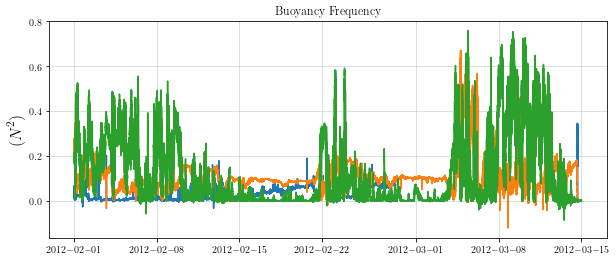

In [47]:
fig, (ax1) = plt.subplots(figsize=(10, 4))

ax1.set_title('Buoyancy Frequency')

ax1.set_ylabel(r"$\displaystyle(N^2)$",
          fontsize=16)
ax1.plot(DC_1.index, N1);
ax1.plot(DC_1.index, N2);
ax1.plot(DC_1.index, N3);
ax1.grid(alpha=0.5)

## Caudal

In [48]:
Q.index = pd.to_datetime(Q['fecha'])

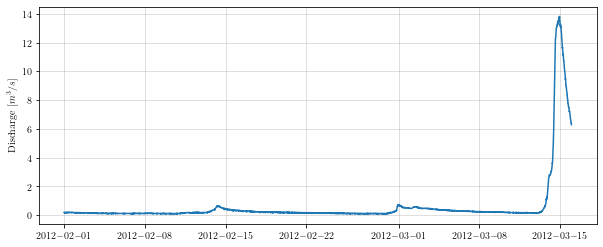

In [49]:
fig, (ax1) = plt.subplots(figsize=(10, 4))

ax1.plot(Q['fecha'], Q['caudal']*0.0283168);
ax1.set_ylabel('Discharge [$m^3/s$]')
ax1.grid(alpha=0.5)

# (1) Estado cerrado de la boca

## First breach

We are going to analyse 1 offshore wind event and 1 onshore wind event

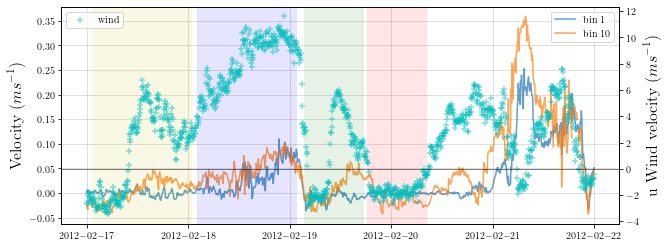

In [50]:
fig, (ax1) = plt.subplots(figsize=(10, 4))

x1 = dfe1_10M.index
x2 = dfe2_10M.index
xw1 = wind_data1.index
xw2 = wind_data2.index

ax1.plot(x1, u1_10M[0,:], alpha=0.7);
ax1.plot(x1, u1_10M[9,:], alpha=0.7);
ax1.legend(["bin 1", "bin 10"], loc='upper right');
ax1.set_ylabel(r"Velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axvline(x=datetime.datetime(2012,2,20,1,30,0), color='r', linewidth=60, alpha=0.1)
ax1.axvline(x=datetime.datetime(2012,2,19,10,30,0), color='g', linewidth=60, alpha=0.1)
ax1.axvline(x=datetime.datetime(2012,2,18,14,0,0), color='b', linewidth=100, alpha=0.1)
ax1.axvline(x=datetime.datetime(2012,2,17,13,0,0), color='y', linewidth=100, alpha=0.1)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.scatter(dfw1.index, -dfw1['u'], color='c',alpha=0.5, marker='+')
ax4.legend(["wind"], loc='upper left');
ax4.axhline(y=0, color='k', linewidth=0.5)


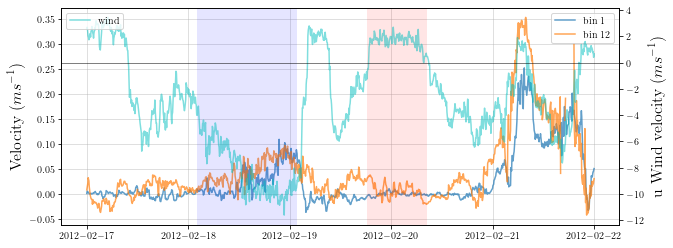

In [51]:
fig, (ax1) = plt.subplots(figsize=(10, 4))

x1 = dfe1_10M.index
x2 = dfe2_10M.index
xw1 = wind_data1.index
xw2 = wind_data2.index

ax1.plot(x1, u1_10M[0,:], alpha=0.7);
ax1.plot(x1, u1_10M[11,:], alpha=0.7);
ax1.legend(["bin 1", "bin 12"], loc='upper right');
ax1.set_ylabel(r"Velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax1.grid(alpha=0.5)
ax1.axvline(x=datetime.datetime(2012,2,20,1,30,0), color='r', linewidth=60, alpha=0.1)
ax1.axvline(x=datetime.datetime(2012,2,18,14,0,0), color='b', linewidth=100, alpha=0.1)
# ax1.text(pd.to_datetime('2012-3-16'),2.95, '(A)')

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity "
          r"$\displaystyle(ms^{-1})$",
          fontsize=16)
ax4.plot(dfw1.index, dfw1['u'], color='c',alpha=0.5)
ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.legend(["wind"], loc='upper left');

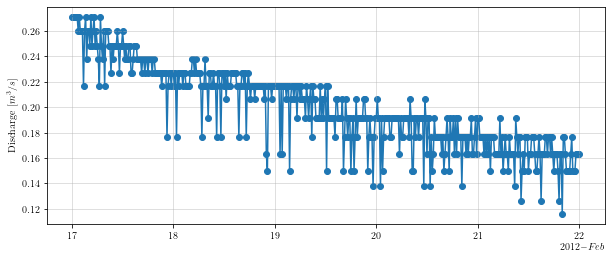

In [52]:
Q1 = Q.loc[datetime.datetime(2012,2,17,0,0,0):datetime.datetime(2012,2,22,0,0,0)]
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, (ax1) = plt.subplots(figsize=(10, 4))

ax1.scatter(Q1['fecha'], Q1['caudal']*0.0283168);
ax1.plot(Q1['fecha'], Q1['caudal']*0.0283168);
ax1.set_ylabel('Discharge [$m^3/s$]')
ax1.grid(alpha=0.5)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

### Offshore wind event

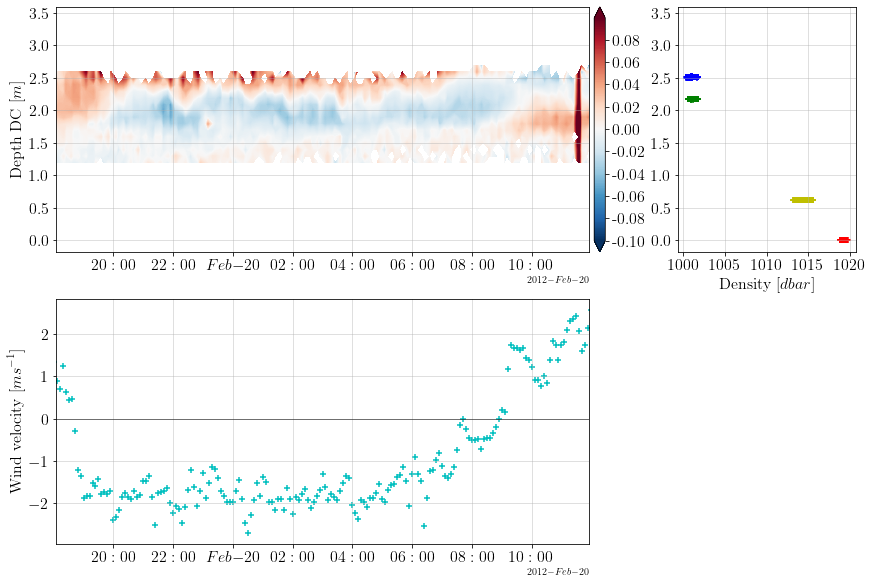

In [53]:
df = bu1.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
wdf = dfw1['u'].loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
dc1 = DC_1.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
dc2 = DC_2.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
dc3 = DC_3.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
dc4 = DC_4.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,12,0,0)]
y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.1
umax = 0.1
vmin = -0.1
vmax = 0.1
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = GridSpec(2, 8, figure=fig)


# ax1.set_title(r"Velocity 1st breach "
#           r"$\displaystyle(ms^{-1})$",
#           fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)

ax1 = fig.add_subplot(gs[0, :6])
contourf_ = ax1.contourf(df.index, y_bin,
                         np.transpose(df.values),
                         levels=level_boundaries_u,
                         cmap=cm.RdBu_r,
                         vmax=umax, vmin=umin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.01)
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

ax1.set_ylabel(r"Depth DC "
          r"$\displaystyle[m]$",
          fontsize=16)
ax1.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax3 =  fig.add_subplot(gs[1, :6],sharex=ax1)
ax3.set_ylabel(r"Wind velocity "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax3.scatter(wdf.index, -wdf.values,color='c',marker='+')
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax2 = fig.add_subplot(gs[0, 6:], sharey=ax1)
ax2.scatter(dc1['densidad'], dc1['Depth']-dc1['Depth'], marker='+',color='r')
ax2.scatter(dc2['densidad'], dc1['Depth']-dc2['Depth'], marker='+',color='y')
ax2.scatter(dc3['densidad'], dc1['Depth']-dc3['Depth'], marker='+',color='g')
ax2.scatter(dc4['densidad'], dc1['Depth']-dc4['Depth'], marker='+',color='b')
ax2.set_xlabel(r"Density "
          r"$\displaystyle[dbar]$",
          fontsize=16)
ax2.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)

plt.show() 

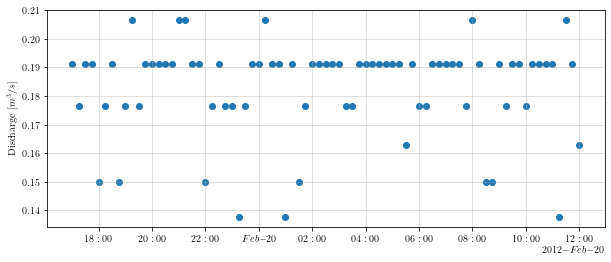

In [54]:
Q1 = Q.loc[datetime.datetime(2012,2,19,17,0,0):datetime.datetime(2012,2,20,12,0,0)]
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, (ax1) = plt.subplots(figsize=(10, 4))

ax1.scatter(Q1['fecha'], Q1['caudal']*0.0283168);
ax1.set_ylabel('Discharge [$m^3/s$]')
ax1.grid(alpha=0.5)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

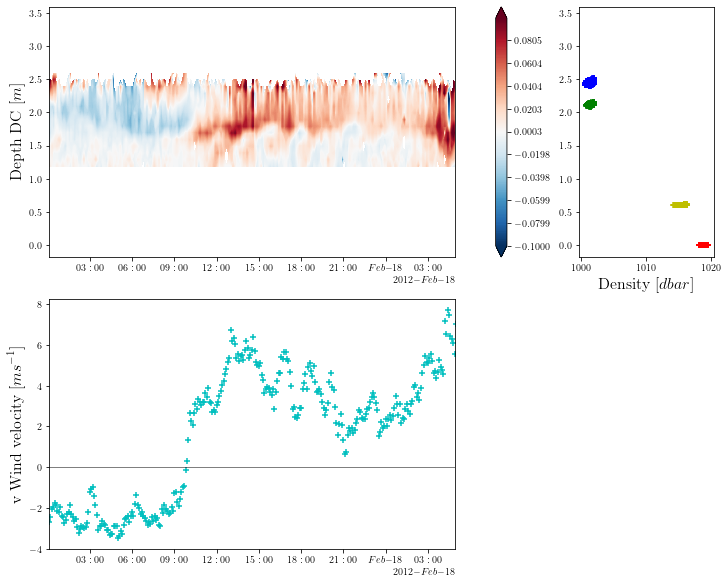

In [55]:
df = bu1.loc[datetime.datetime(2012,2,17,0,0,0):datetime.datetime(2012,2,18,5,0,0)]
wdf = dfw1['u'].loc[datetime.datetime(2012,2,17,0,0,0):datetime.datetime(2012,2,18,5,0,0)]
dc1 = DC_1.loc[datetime.datetime(2012,2,17,0,0,0):datetime.datetime(2012,2,18,5,0,0)]
dc2 = DC_2.loc[datetime.datetime(2012,2,17,0,0,0):datetime.datetime(2012,2,18,5,0,0)]
dc3 = DC_3.loc[datetime.datetime(2012,2,17,0,0,0):datetime.datetime(2012,2,18,5,0,0)]
dc4 = DC_4.loc[datetime.datetime(2012,2,17,0,0,0):datetime.datetime(2012,2,18,5,0,0)]
y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.1
umax = 0.1
vmin = -0.1
vmax = 0.1
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig = plt.figure(figsize=(10, 8), constrained_layout=True)
gs = GridSpec(2, 8, figure=fig)


# ax1.set_title(r"Velocity 1st breach "
#           r"$\displaystyle(ms^{-1})$",
#           fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)

ax1 = fig.add_subplot(gs[0, :6])
contourf_ = ax1.contourf(df.index, y_bin,
                         np.transpose(df.values),
                         levels=level_boundaries_u,
                         cmap=cm.RdBu_r,
                         vmax=umax, vmin=umin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.1)
ax1.set_ylabel(r"Depth DC "
          r"$\displaystyle[m]$",
          fontsize=16)

ax3 =  fig.add_subplot(gs[1, :6],sharex=ax1)
ax3.set_ylabel(r"v Wind velocity "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax3.scatter(wdf.index, -wdf.values,color='c', marker='+')
ax3.axhline(y=0, color='k', linewidth=0.5)

ax2 = fig.add_subplot(gs[0, 6:], sharey=ax1)
ax2.scatter(dc1['densidad'], dc1['Depth']-dc1['Depth'], marker='+',color='r')
ax2.scatter(dc2['densidad'], dc1['Depth']-dc2['Depth'], marker='+',color='y')
ax2.scatter(dc3['densidad'], dc1['Depth']-dc3['Depth'], marker='+',color='g')
ax2.scatter(dc4['densidad'], dc1['Depth']-dc4['Depth'], marker='+',color='b')
ax2.set_xlabel(r"Density "
          r"$\displaystyle[dbar]$",
          fontsize=16)

ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)

plt.show() 

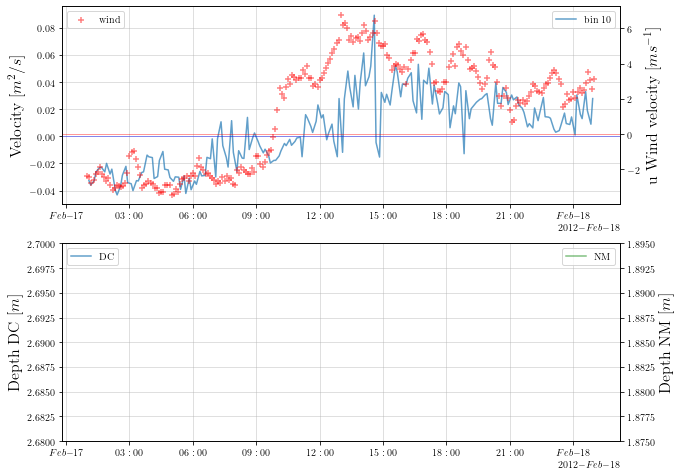

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = bu1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
datw1 = dfw1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

prof_DC = DC_1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
prof_NM = NM_1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

ax1.plot(dat1.index, dat1['bin_10'], alpha=0.7);
ax1.legend(["bin 10"], loc='upper right');
ax1.set_ylabel('Velocity $[m^2/s]$', fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='b', linewidth=0.5, alpha=0.8)

ax2.plot(prof_DC.index, prof_DC['Depth'], alpha=0.7);
ax2.set_ylabel('Depth DC $[m]$', fontsize=16)
ax2.set_ylim(2.68, 2.7)
ax2.grid(alpha=0.5)
ax2.legend(["DC"], loc='upper left');

ax3 = ax2.twinx()
ax3.set_ylabel(r"Depth NM $[m]$",
          fontsize=16)
ax3.plot(prof_NM.index, prof_NM['Depth'], alpha=0.5, c='g');
ax3.set_ylim(1.875, 1.895)
ax3.legend(["NM"], loc='upper right');

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity $[ms^{-1}]$",
          fontsize=16)
ax4.scatter(datw1.index, -datw1['u'], color='r',alpha=0.5, marker='+')
ax4.legend(["wind"], loc='upper left');
ax4.axhline(y=0, color='r', linewidth=0.5, alpha=0.8)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)
ax3.xaxis.set_major_locator(locator2)
ax3.xaxis.set_major_formatter(formatter2)

ax4.xaxis.set_major_locator(locator1)
ax4.xaxis.set_major_formatter(formatter1)

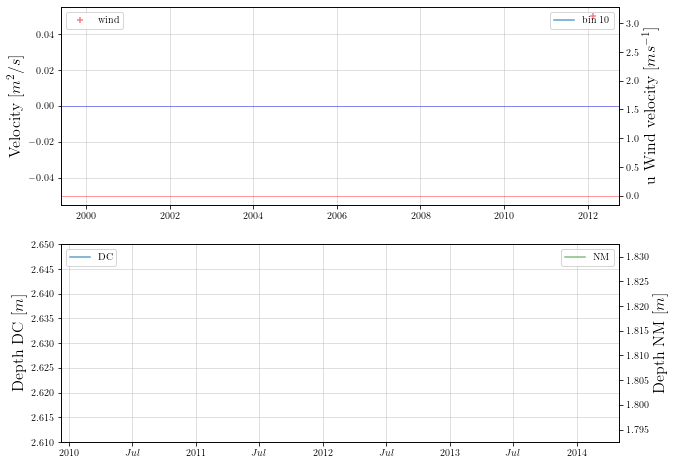

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = bu1.loc[datetime.datetime(2012,2,18,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
datw1 = dfw1.loc[datetime.datetime(2012,2,18,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

prof_DC = DC_1.loc[datetime.datetime(2012,2,18,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
prof_NM = NM_1.loc[datetime.datetime(2012,2,18,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

ax1.plot(dat1.index, dat1['bin_10'], alpha=0.7);
ax1.legend(["bin 10"], loc='upper right');
ax1.set_ylabel('Velocity $[m^2/s]$', fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='b', linewidth=0.5, alpha=0.8)

ax2.plot(prof_DC.index, prof_DC['Depth'], alpha=0.7);
ax2.set_ylabel('Depth DC $[m]$', fontsize=16)
ax2.set_ylim(2.61, 2.65)
ax2.grid(alpha=0.5)
ax2.legend(["DC"], loc='upper left');

ax3 = ax2.twinx()
ax3.set_ylabel(r"Depth NM $[m]$",
          fontsize=16)
ax3.plot(prof_NM.index, prof_NM['Depth'], alpha=0.5, c='g');
ax3.set_ylim(1.7925, 1.8325)
ax3.legend(["NM"], loc='upper right');

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity $[ms^{-1}]$",
          fontsize=16)
ax4.scatter(datw1.index, -datw1['u'], color='r',alpha=0.5, marker='+')
ax4.legend(["wind"], loc='upper left');
ax4.axhline(y=0, color='r', linewidth=0.5, alpha=0.8)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)
ax3.xaxis.set_major_locator(locator2)
ax3.xaxis.set_major_formatter(formatter2)

ax4.xaxis.set_major_locator(locator1)
ax4.xaxis.set_major_formatter(formatter1)

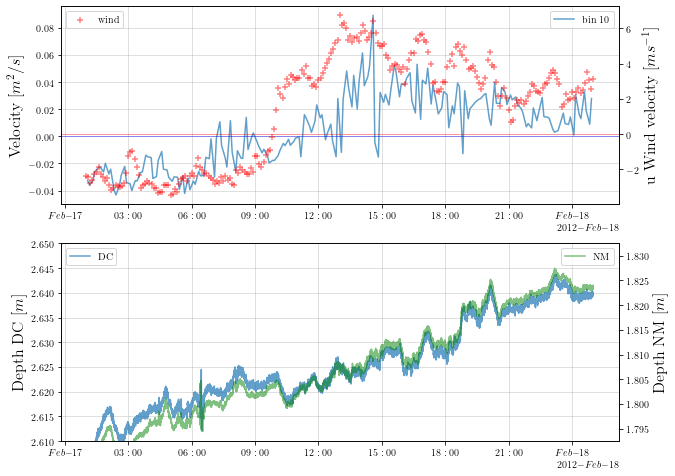

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = bu1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
datw1 = dfw1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

prof_DC = DC_1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
prof_NM = NM_1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

ax1.plot(dat1.index, dat1['bin_10'], alpha=0.7);
ax1.legend(["bin 10"], loc='upper right');
ax1.set_ylabel('Velocity $[m^2/s]$', fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='b', linewidth=0.5, alpha=0.8)

ax2.plot(prof_DC.index, prof_DC['Depth'], alpha=0.7);
ax2.set_ylabel('Depth DC $[m]$', fontsize=16)
ax2.set_ylim(2.61, 2.65)
ax2.grid(alpha=0.5)
ax2.legend(["DC"], loc='upper left');

ax3 = ax2.twinx()
ax3.set_ylabel(r"Depth NM $[m]$",
          fontsize=16)
ax3.plot(prof_NM.index, prof_NM['Depth'], alpha=0.5, c='g');
ax3.set_ylim(1.7925, 1.8325)
ax3.legend(["NM"], loc='upper right');

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity $[ms^{-1}]$",
          fontsize=16)
ax4.scatter(datw1.index, -datw1['u'], color='r',alpha=0.5, marker='+')
ax4.legend(["wind"], loc='upper left');
ax4.axhline(y=0, color='r', linewidth=0.5, alpha=0.8)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)
ax3.xaxis.set_major_locator(locator2)
ax3.xaxis.set_major_formatter(formatter2)

ax4.xaxis.set_major_locator(locator1)
ax4.xaxis.set_major_formatter(formatter1)

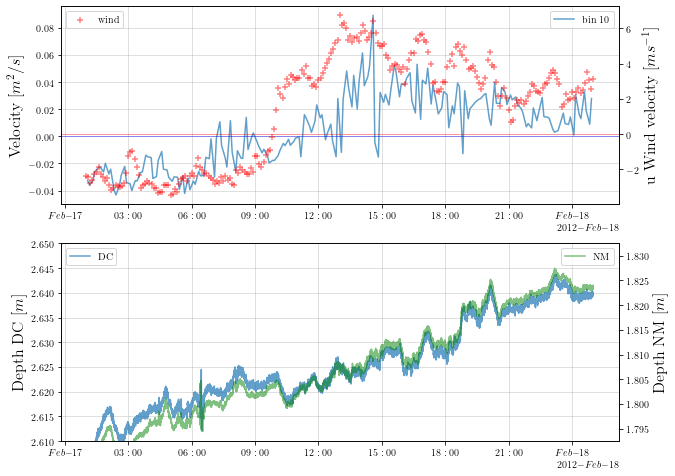

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

locator1 = mdates.AutoDateLocator()
formatter1 = mdates.ConciseDateFormatter(locator1)
locator2 = mdates.AutoDateLocator()
formatter2 = mdates.ConciseDateFormatter(locator2)

dat1 = bu1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
datw1 = dfw1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

prof_DC = DC_1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]
prof_NM = NM_1.loc[datetime.datetime(2012,2,17,1,0,0):datetime.datetime(2012,2,18,1,0,0)]

ax1.plot(dat1.index, dat1['bin_10'], alpha=0.7);
ax1.legend(["bin 10"], loc='upper right');
ax1.set_ylabel('Velocity $[m^2/s]$', fontsize=16)
ax1.grid(alpha=0.5)
ax1.axhline(y=0, color='b', linewidth=0.5, alpha=0.8)

ax2.plot(prof_DC.index, prof_DC['Depth'], alpha=0.7);
ax2.set_ylabel('Depth DC $[m]$', fontsize=16)
ax2.set_ylim(2.61, 2.65)
ax2.grid(alpha=0.5)
ax2.legend(["DC"], loc='upper left');

ax3 = ax2.twinx()
ax3.set_ylabel(r"Depth NM $[m]$",
          fontsize=16)
ax3.plot(prof_NM.index, prof_NM['Depth'], alpha=0.5, c='g');
ax3.set_ylim(1.7925, 1.8325)
ax3.legend(["NM"], loc='upper right');

ax4 = ax1.twinx()
ax4.set_ylabel(r"u Wind velocity $[ms^{-1}]$",
          fontsize=16)
ax4.scatter(datw1.index, -datw1['u'], color='r',alpha=0.5, marker='+')
ax4.legend(["wind"], loc='upper left');
ax4.axhline(y=0, color='r', linewidth=0.5, alpha=0.8)

ax1.xaxis.set_major_locator(locator1)
ax1.xaxis.set_major_formatter(formatter1)
ax2.xaxis.set_major_locator(locator2)
ax2.xaxis.set_major_formatter(formatter2)
ax3.xaxis.set_major_locator(locator2)
ax3.xaxis.set_major_formatter(formatter2)

ax4.xaxis.set_major_locator(locator1)
ax4.xaxis.set_major_formatter(formatter1)

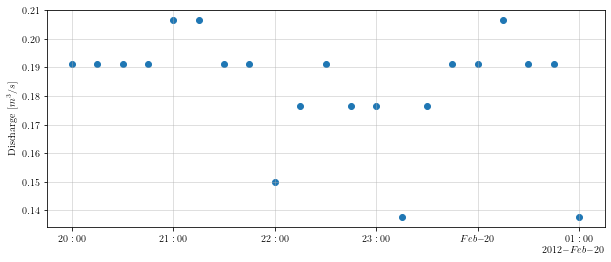

In [60]:
Q1 = Q.loc[datetime.datetime(2012,2,19,20,0,0):datetime.datetime(2012,2,20,1,0,0)]
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, (ax1) = plt.subplots(figsize=(10, 4))

ax1.scatter(Q1['fecha'], Q1['caudal']*0.0283168);
ax1.set_ylabel('Discharge [$m^3/s$]')
ax1.grid(alpha=0.5)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

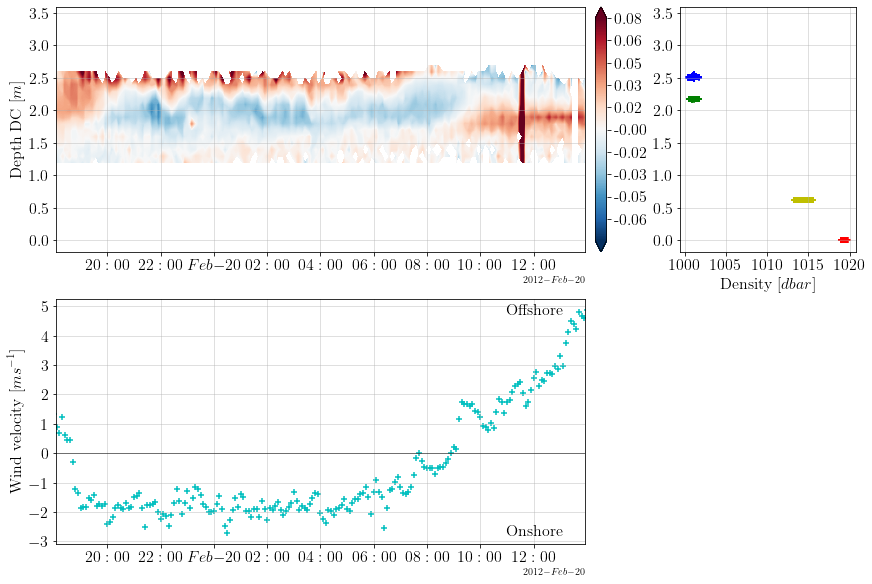

In [61]:
df = bu1.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,14,0,0)]
wdf = dfw1['u'].loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,14,0,0)]
dc1 = DC_1.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,14,0,0)]
dc2 = DC_2.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,14,0,0)]
dc3 = DC_3.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,14,0,0)]
dc4 = DC_4.loc[datetime.datetime(2012,2,19,18,0,0):datetime.datetime(2012,2,20,14,0,0)]
y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.08
umax = 0.08
vmin = -0.1
vmax = 0.1
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = GridSpec(2, 8, figure=fig)


# ax1.set_title(r"Velocity 1st breach "
#           r"$\displaystyle(ms^{-1})$",
#           fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)

ax1 = fig.add_subplot(gs[0, :6])
contourf_ = ax1.contourf(df.index, y_bin,
                         np.transpose(df.values),
                         levels=level_boundaries_u,
                         cmap=cm.RdBu_r,
                         vmax=umax, vmin=umin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.02)
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
ax1.set_ylabel(r"Depth DC "
          r"$\displaystyle[m]$",
          fontsize=16)
ax1.grid(alpha=0.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax3 =  fig.add_subplot(gs[1, :6],sharex=ax1)
ax3.set_ylabel(r"Wind velocity "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax3.scatter(wdf.index, -wdf.values,color='c', marker='+')
ax3.axhline(y=0, color='k', linewidth=0.5)
# ax3.text(pd.to_datetime('2012-3-16 16:00:00'),8, 'Offshore')
ax3.annotate('Onshore', (0.85, 0.05),
             fontsize=16,
               xycoords='axes fraction', va='center')
ax3.annotate('Offshore', (0.85, 0.95),
          fontsize=16,
               xycoords='axes fraction', va='center')
ax3.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax2 = fig.add_subplot(gs[0, 6:], sharey=ax1)
ax2.scatter(dc1['densidad'], dc1['Depth']-dc1['Depth'], marker='+',color='r')
ax2.scatter(dc2['densidad'], dc1['Depth']-dc2['Depth'], marker='+',color='y')
ax2.scatter(dc3['densidad'], dc1['Depth']-dc3['Depth'], marker='+',color='g')
ax2.scatter(dc4['densidad'], dc1['Depth']-dc4['Depth'], marker='+',color='b')
ax2.set_xlabel(r"Density "
          r"$\displaystyle[dbar]$",
          fontsize=16)
ax2.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)

# plt.savefig('pescadero_vel.png')

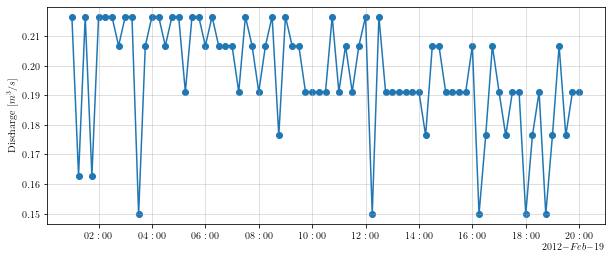

In [62]:
Q1 = Q.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, (ax1) = plt.subplots(figsize=(10, 4))

ax1.scatter(Q1['fecha'], Q1['caudal']*0.0283168);
ax1.plot(Q1['fecha'], Q1['caudal']*0.0283168);
ax1.set_ylabel('Discharge [$m^3/s$]')
ax1.grid(alpha=0.5)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

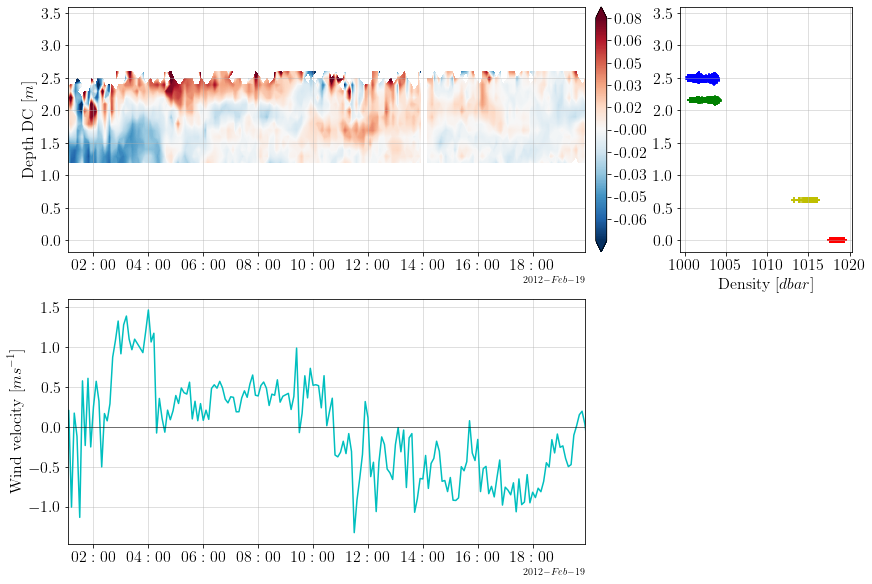

In [63]:
df = bv1.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
wdf = dfw1['v'].loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
dc1 = DC_1.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
dc2 = DC_2.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
dc3 = DC_3.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
dc4 = DC_4.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
y_bin = np.linspace(1.19, 3.59, 25)
umin = -0.08
umax = 0.08
vmin = -0.08
vmax = 0.08
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = GridSpec(2, 8, figure=fig)


# ax1.set_title(r"Velocity 1st breach "
#           r"$\displaystyle(ms^{-1})$",
#           fontsize=16)
# Make room for the ridiculously large title.
# plt.subplots_adjust(top=0.8)
# ax1.plot(x, y_d,color='k',alpha=0.5)

ax1 = fig.add_subplot(gs[0, :6])
contourf_ = ax1.contourf(df.index, y_bin,
                         np.transpose(df.values),
                         levels=level_boundaries_v,
                         cmap=cm.RdBu_r,
                         vmax=vmax, vmin=vmin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.02)
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
ax1.set_ylabel(r"Depth DC "
          r"$\displaystyle[m]$",
          fontsize=16)
ax1.grid(alpha=0.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax3 =  fig.add_subplot(gs[1, :6],sharex=ax1)
ax3.set_ylabel(r"Wind velocity "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax3.plot(wdf.index, wdf.values,color='c')
ax3.axhline(y=0, color='k', linewidth=0.5)
# ax3.annotate('Onshore', (0.85, 0.05),
#              fontsize=16,
#                xycoords='axes fraction', va='center')
# ax3.annotate('Offshore', (0.85, 0.95),
#           fontsize=16,
#                xycoords='axes fraction', va='center')
ax3.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax2 = fig.add_subplot(gs[0, 6:], sharey=ax1)
ax2.scatter(dc1['densidad'], dc1['Depth']-dc1['Depth'], marker='+',color='r')
ax2.scatter(dc2['densidad'], dc1['Depth']-dc2['Depth'], marker='+',color='y')
ax2.scatter(dc3['densidad'], dc1['Depth']-dc3['Depth'], marker='+',color='g')
ax2.scatter(dc4['densidad'], dc1['Depth']-dc4['Depth'], marker='+',color='b')
ax2.set_xlabel(r"Density "
          r"$\displaystyle[dbar]$",
          fontsize=16)
ax2.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)

# plt.savefig('pescadero_vel.png')

Text(0.5, 1.0, 'Varying Color')

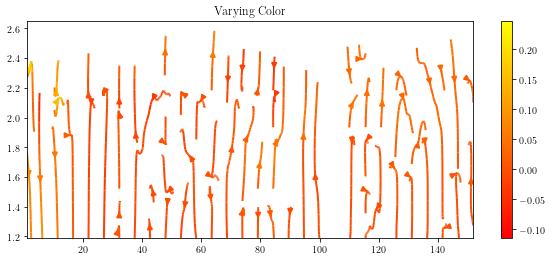

In [64]:
U = bu1.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]
V = bv1.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)]

fig, (ax1) = plt.subplots(figsize=(10, 4))

strm = ax1.streamplot(np.linspace(1,152, 152), y_bin, np.transpose(U.values), np.transpose(V.values), color=np.transpose(U.values), linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

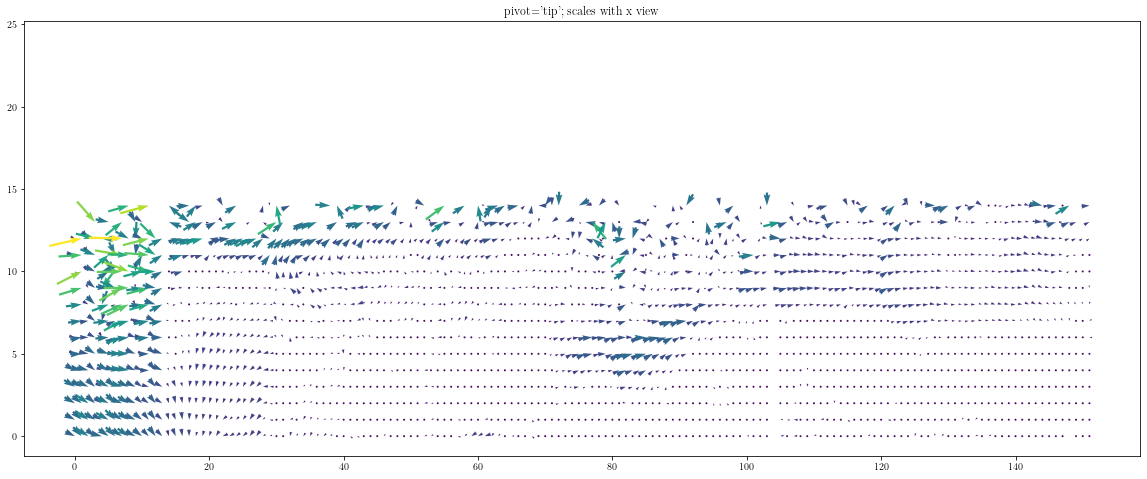

In [65]:
U = np.transpose(bu1.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)].values)
V = np.transpose(bv1.loc[datetime.datetime(2012,2,19,1,0,0):datetime.datetime(2012,2,19,20,0,0)].values)
X = np.linspace(1,152, 152)
Y = y_bin

fig3, ax3 = plt.subplots(figsize=(20, 8))
ax3.set_title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = ax3.quiver(U, V, M, pivot='tip', width=0.002,
               scale=1/0.12)
# qk = ax3.quiverkey(Q, 0.08, 0.08, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')
# ax3.scatter(X, Y, color='0.5', s=1)

plt.show()

In [66]:
M.shape

(25, 152)

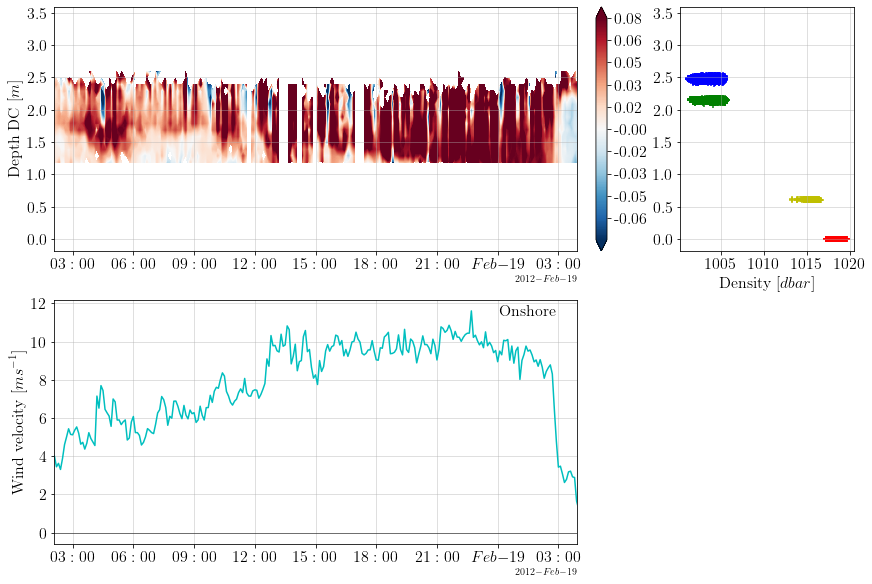

In [67]:
# Datos iniciales
df = bu1.loc[datetime.datetime(2012,2,18,2,0,0):datetime.datetime(2012,2,19,4,0,0)]
wdf = dfw1['u'].loc[datetime.datetime(2012,2,18,2,0,0):datetime.datetime(2012,2,19,4,0,0)]
dc1 = DC_1.loc[datetime.datetime(2012,2,18,2,0,0):datetime.datetime(2012,2,19,4,0,0)]
dc2 = DC_2.loc[datetime.datetime(2012,2,18,2,0,0):datetime.datetime(2012,2,19,4,0,0)]
dc3 = DC_3.loc[datetime.datetime(2012,2,18,2,0,0):datetime.datetime(2012,2,19,4,0,0)]
dc4 = DC_4.loc[datetime.datetime(2012,2,18,2,0,0):datetime.datetime(2012,2,19,4,0,0)]
y_bin = np.linspace(1.19, 3.59, 25)

#Ajustar limites colorbar
umin = -0.08
umax = 0.08
vmin = -0.1
vmax = 0.1
level_boundaries_u = np.linspace(umin, umax, 400)
level_boundaries_v = np.linspace(vmin, vmax, 400)

#Formato fecha
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

#Inicio figura
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
gs = GridSpec(2, 8, figure=fig)

#Grafico de velocidad del agua (color map)
ax1 = fig.add_subplot(gs[0, :6])
contourf_ = ax1.contourf(df.index, y_bin,
                         np.transpose(df.values),
                         levels=level_boundaries_u,
                         cmap=cm.RdBu_r,
                         vmax=umax, vmin=umin, extend='both')
cbar = fig.colorbar(contourf_, ax=ax1, pad=0.03)
cbar.ax.tick_params(labelsize=16)
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
ax1.set_ylabel(r"Depth DC "
          r"$\displaystyle[m]$",
          fontsize=16)
ax1.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Grafico velocidad viento
ax3 =  fig.add_subplot(gs[1, :6],sharex=ax1)
ax3.set_ylabel(r"Wind velocity "
          r"$\displaystyle[ms^{-1}]$",
          fontsize=16)
ax3.plot(wdf.index, -wdf.values,color='c')
ax3.axhline(y=0, color='k', linewidth=0.5)
# ax3.text(pd.to_datetime('2012-3-16 16:00:00'),8, 'Offshore')
# ax3.annotate('Offshore', (0.85, 0.05),
#              fontsize=16,
#                xycoords='axes fraction', va='center')
ax3.annotate('Onshore', (0.85, 0.95),
          fontsize=16,
               xycoords='axes fraction', va='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Grafico densidad
ax2 = fig.add_subplot(gs[0, 6:], sharey=ax1)
ax2.scatter(dc1['densidad'], dc1['Depth']-dc1['Depth'], marker='+',color='r')
ax2.scatter(dc2['densidad'], dc1['Depth']-dc2['Depth'], marker='+',color='y')
ax2.scatter(dc3['densidad'], dc1['Depth']-dc3['Depth'], marker='+',color='g')
ax2.scatter(dc4['densidad'], dc1['Depth']-dc4['Depth'], marker='+',color='b')
ax2.set_xlabel(r"Density "
          r"$\displaystyle[dbar]$",
          fontsize=16)
ax2.grid(alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Ajustar formato fecha
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
ax3.grid(alpha=0.5)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show() 